## Setup and imports

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import itertools
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style('whitegrid')
sns.set_palette('colorblind')
 
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

MARKERS = 'o v ^ < > s p P * x X D d'.split()

In [2]:
pd.set_option('display.max_rows', None)

# Please change your output folder and work directory here

In [3]:
OUTDIR = "/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/Final_figures/Fig3_Jan07/"
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    
WORKDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference'
os.chdir(WORKDIR)

# Configurations

## Correct the name of algorithms

In [32]:
ALG_FIX = {
    'inferelator': 'Inferelator',
    'knnDREMI': 'kNN-DREMI',
    'pearson': 'Pearson',
    'random': 'Random'
}

ALGORITHMS = [ALG_FIX.get(a, a) for a in ALGORITHMS]

In [6]:
ALGORITHMS

['Inferelator',
 'kNN-DREMI',
 'LEAP',
 'MERLIN',
 'Pearson',
 'PIDC',
 'Random',
 'SCENIC',
 'SCODE',
 'Scribe',
 'SILGGM']

In [28]:
# This is previous order 
ALGORITHMS = 'pearson inferelator kNN-DREMI LEAP PIDC Scribe SILGGM MERLIN SCENIC SCODE Random'.split()
ALGORITHMS = sorted(ALGORITHMS, key=lambda s: s.lower())

In [8]:
# METRICS names is the original column names in the score matrix
METRICS = [
    'fscore',
    'AUPR',
    'n_TFs',
    'precision'
]

In [9]:
metrics = [
    'fscore',
    'AUPR',
    'n_TFs'
]

In [10]:
PRIMARY_GS = ['Perturb', 'ChIP', 'Perturb+ChIP']


In [35]:
TOP_N = 5000

idx_cols = 'dataset algorithm proc GS_src'.split()

# Load metrics
fscores = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/fscores/agg_fscores.normalized.txt').set_index(idx_cols)
aupr = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/AUPR/agg_AUPR.normalized.txt').set_index(idx_cols)
predTFs = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/predictable_TFs/agg_predictable_TFs.normalized.txt').set_index(idx_cols)

# Choose top N edges (except AUPR, which is based on all edges)
fscores = fscores.loc[fscores.n_edges == TOP_N].drop('n_edges', axis=1)
predTFs = predTFs.loc[predTFs.n_edges == TOP_N].drop('n_edges', axis=1)
aupr = aupr.loc[aupr.n_edges == 'all_edges'].drop('n_edges', axis=1)

# Concatenate metrics and toss what we don't care about
scores = pd.concat([fscores, aupr, predTFs], axis=1).reset_index()
scores = scores.loc[~scores.GS_src.str.endswith('KDUnion_c2')].copy()

scores.algorithm = scores.algorithm.replace(ALG_FIX)
scores = scores.loc[scores.algorithm.isin(ALGORITHMS)]

# # The loaded results are all normalized so we don't need proc column, pred_TFs
# # listed all predicted TFs, we don't need this column
scores = scores.drop(['proc', 'pred_TFs'], axis=1)

In [36]:
# While this scores matrix is still incorrect, because the GS_src names are not wanted
scores

dataset    algorithm                             GS_src  \
0      gasch_GSE102475  Inferelator                                 hu   
1      gasch_GSE102475  Inferelator                               mac2   
2      gasch_GSE102475  Inferelator                       yeastract_c3   
3      gasch_GSE102475  Inferelator                       yeastract_t2   
4      gasch_GSE102475  Inferelator                    yeast_chipunion   
5      gasch_GSE102475  Inferelator                      yeast_KDUnion   
6      gasch_GSE102475  Inferelator  yeast_chipunion_KDUnion_intersect   
7        han_GSE107552  Inferelator                    hESC_encodechip   
8        han_GSE107552  Inferelator                    hESC_escapechip   
9        han_GSE107552  Inferelator                     hESC_chipunion   
10       han_GSE107552  Inferelator                         hESC_logof   
11       han_GSE107552  Inferelator                     hESC_nishiyama   
12       han_GSE107552  Inferelator                       hESC_KDUnion   
13       han_GSE107552  Inferelator   hESC_chipunion_KDUnion_intersect   
14       han_GSE107552  Inferelator                           hESC_lit   
15       sridharan_A2S  Inferelator                    mESC_escapechip   
16       sridharan_A2S  Inferelator                    mESC_encodechip   
17       sridharan_A2S  Inferelator                     mESC_chipunion   
18       sridharan_A2S  Inferelator                         mESC_logof   
19       sridharan_A2S  Inferelator                     mESC_nishiyama   
20       sridharan_A2S  Inferelator                       mESC_KDUnion   
21       sridharan_A2S  Inferelator   mESC_chipunion_KDUnion_intersect   
22       sridharan_A2S  Inferelator            mESC_ATAC_Day4Day6Union   
23       sridharan_A2S  Inferelator                           mESC_lit   
24       sridharan_FBS  Inferelator                    mESC_escapechip   
25       sridharan_FBS  Inferelator                    mESC_encodechip   
26       sridharan_FBS  Inferelator                     mESC_chipunion   
27       sridharan_FBS  Inferelator                         mESC_logof   
28       sridharan_FBS  Inferelator                     mESC_nishiyama   
29       sridharan_FBS  Inferelator                       mESC_KDUnion   
30       sridharan_FBS  Inferelator   mESC_chipunion_KDUnion_intersect   
31       sridharan_FBS  Inferelator            mESC_ATAC_Day4Day6Union   
32       sridharan_FBS  Inferelator                           mESC_lit   
33     shalek_GSE48968  Inferelator                      mDC_chipunion   
34     shalek_GSE48968  Inferelator                        mDC_KDUnion   
35     shalek_GSE48968  Inferelator    mDC_chipunion_KDUnion_intersect   
36      zhao_GSE114952  Inferelator                    mESC_escapechip   
37      zhao_GSE114952  Inferelator                    mESC_encodechip   
38      zhao_GSE114952  Inferelator                     mESC_chipunion   
39      zhao_GSE114952  Inferelator                         mESC_logof   
40      zhao_GSE114952  Inferelator                     mESC_nishiyama   
41      zhao_GSE114952  Inferelator                       mESC_KDUnion   
42      zhao_GSE114952  Inferelator   mESC_chipunion_KDUnion_intersect   
43      zhao_GSE114952  Inferelator            mESC_ATAC_Day4Day6Union   
44      zhao_GSE114952  Inferelator                           mESC_lit   
45   jackson_GSE125162  Inferelator                                 hu   
46   jackson_GSE125162  Inferelator                               mac2   
47   jackson_GSE125162  Inferelator                       yeastract_c3   
48   jackson_GSE125162  Inferelator                       yeastract_t2   
49   jackson_GSE125162  Inferelator                    yeast_chipunion   
50   jackson_GSE125162  Inferelator                      yeast_KDUnion   
51   jackson_GSE125162  Inferelator  yeast_chipunion_KDUnion_intersect   
52     gasch_GSE102475    kNN-DREMI                                 hu   
53     gasch_GSE102

In [37]:
scores['GS_src'].value_counts()

mESC_lit                             31
mESC_logof                           31
mESC_encodechip                      31
mESC_escapechip                      31
mESC_nishiyama                       31
mESC_KDUnion                         31
mESC_chipunion_KDUnion_intersect     31
mESC_ATAC_Day4Day6Union              31
mESC_chipunion                       31
yeast_chipunion_KDUnion_intersect    21
yeast_KDUnion                        21
mac2                                 21
yeast_chipunion                      21
yeastract_t2                         21
yeastract_c3                         21
hu                                   21
mDC_chipunion                        11
mDC_KDUnion                          11
hESC_chipunion_KDUnion_intersect     11
hESC_lit                             11
hESC_KDUnion                         11
hESC_nishiyama                       11
hESC_logof                           11
hESC_chipunion                       11
hESC_escapechip                      11


In [38]:
scores["dataset"].value_counts()

sridharan_A2S        99
sridharan_FBS        99
han_GSE107552        88
zhao_GSE114952       81
gasch_GSE102475      77
jackson_GSE125162    70
shalek_GSE48968      33
Name: dataset, dtype: int64

# Rename gold standard and metrics

In [39]:
# Rename gold standards
cell_types = 'yeast mESC mDC hESC'.split()
def clean_GS_src(GS_src):
    data = GS_src.split("_")
    if data[0] in cell_types:
        return '_'.join(data[1:])
    else:
        return '_'.join(data)
    
# Strip cell type labels from gold standard names
scores.GS_src = scores.GS_src.apply(clean_GS_src)

# and renanme the three primary gold standards
scores.GS_src = scores.GS_src.replace({'KDUnion': 'Perturb', 
                                       'chipunion': 'ChIP',
                                       'chipunion_KDUnion_intersect': 'Perturb+ChIP'})

In [40]:
scores

dataset    algorithm              GS_src  precision  recall  \
0      gasch_GSE102475  Inferelator                  hu     0.0182  0.0143   
1      gasch_GSE102475  Inferelator                mac2     0.0212  0.0485   
2      gasch_GSE102475  Inferelator        yeastract_c3     0.0288  0.0617   
3      gasch_GSE102475  Inferelator        yeastract_t2     0.0312  0.0608   
4      gasch_GSE102475  Inferelator                ChIP     0.0342  0.0139   
5      gasch_GSE102475  Inferelator             Perturb     0.0376  0.0115   
6      gasch_GSE102475  Inferelator        Perturb+ChIP     0.0278  0.0774   
7        han_GSE107552  Inferelator          encodechip     0.4510  0.0177   
8        han_GSE107552  Inferelator          escapechip     0.2044  0.0251   
9        han_GSE107552  Inferelator                ChIP     0.4010  0.0125   
10       han_GSE107552  Inferelator               logof     0.2128  0.0260   
11       han_GSE107552  Inferelator           nishiyama     0.1060  0.0088   
12       han_GSE107552  Inferelator             Perturb     0.1420  0.0093   
13       han_GSE107552  Inferelator        Perturb+ChIP     0.1212  0.0716   
14       han_GSE107552  Inferelator                 lit     0.0922  0.9868   
15       sridharan_A2S  Inferelator          escapechip     0.2266  0.0289   
16       sridharan_A2S  Inferelator          encodechip     0.2870  0.5623   
17       sridharan_A2S  Inferelator                ChIP     0.2310  0.0290   
18       sridharan_A2S  Inferelator               logof     0.1602  0.0237   
19       sridharan_A2S  Inferelator           nishiyama     0.0590  0.0065   
20       sridharan_A2S  Inferelator             Perturb     0.0960  0.0083   
21       sridharan_A2S  Inferelator        Perturb+ChIP     0.0904  0.0631   
22       sridharan_A2S  Inferelator  ATAC_Day4Day6Union     0.1486  0.0173   
23       sridharan_A2S  Inferelator                 lit     0.1040  1.0000   
24       sridharan_FBS  Inferelator          escapechip     0.1974  0.0259   
25       sridharan_FBS  Inferelator          encodechip     0.2886  0.5677   
26       sridharan_FBS  Inferelator                ChIP     0.2006  0.0258   
27       sridharan_FBS  Inferelator               logof     0.1714  0.0274   
28       sridharan_FBS  Inferelator           nishiyama     0.0716  0.0083   
29       sridharan_FBS  Inferelator             Perturb     0.1030  0.0093   
30       sridharan_FBS  Inferelator        Perturb+ChIP     0.1088  0.0786   
31       sridharan_FBS  Inferelator  ATAC_Day4Day6Union     0.1550  0.0182   
32       sridharan_FBS  Inferelator                 lit     0.1045  1.0000   
33     shalek_GSE48968  Inferelator                ChIP     0.5502  0.0285   
34     shalek_GSE48968  Inferelator             Perturb     0.4452  0.0150   
35     shalek_GSE48968  Inferelator        Perturb+ChIP     0.4794  0.0354   
36      zhao_GSE114952  Inferelator          escapechip     0.2736  0.0281   
37      zhao_GSE114952  Inferelator          encodechip     0.2742  0.4415   
38      zhao_GSE114952  Inferelator                ChIP     0.2882  0.0291   
39      zhao_GSE114952  Inferelator               logof     0.1722  0.0153   
40      zhao_GSE114952  Inferelator           nishiyama     0.1518  0.0090   
41      zhao_GSE114952  Inferelator             Perturb     0.1906  0.0092   
42      zhao_GSE114952  Inferelator        Perturb+ChIP     0.1376  0.0763   
43      zhao_GSE114952  Inferelator  ATAC_Day4Day6Union     0.1292  0.0099   
44      zhao_GSE114952  Inferelator                 lit     0.0996  1.0000   
45   jackson_GSE125162  Inferelator                  hu     0.0100  0.0053   
46   jackson_GSE125162  Inferelator                mac2     0.0310  0.0424   
47   jackson_GSE125162  Inferelator        yeastract_c3     0.0332  0.0452   
48   jackson_GSE125162  Inferelator        yeastract_t2     0.0322  0.0398   
49   jackson_GSE125162  Inferelator                ChIP     0.0568  0.0117   
50   jackson_GSE125162  Inferelator  

# Melt the dataframe

In [41]:
# melt is making the dataframe longer
scores = pd.melt(scores, 
                 id_vars=['dataset', 'algorithm', 'GS_src'], # The columns conserved
                 value_vars=METRICS, # The columns to melt
                 var_name='metric', # The summary column name of the category
                 value_name='score') # The column name of the score column

In [42]:
scores

dataset    algorithm              GS_src     metric      score
0       gasch_GSE102475  Inferelator                  hu     fscore   0.016000
1       gasch_GSE102475  Inferelator                mac2     fscore   0.029500
2       gasch_GSE102475  Inferelator        yeastract_c3     fscore   0.039300
3       gasch_GSE102475  Inferelator        yeastract_t2     fscore   0.041200
4       gasch_GSE102475  Inferelator                ChIP     fscore   0.019700
5       gasch_GSE102475  Inferelator             Perturb     fscore   0.017600
6       gasch_GSE102475  Inferelator        Perturb+ChIP     fscore   0.040900
7         han_GSE107552  Inferelator          encodechip     fscore   0.034000
8         han_GSE107552  Inferelator          escapechip     fscore   0.044600
9         han_GSE107552  Inferelator                ChIP     fscore   0.024300
10        han_GSE107552  Inferelator               logof     fscore   0.046300
11        han_GSE107552  Inferelator           nishiyama     fscore   0.016200
12        han_GSE107552  Inferelator             Perturb     fscore   0.017500
13        han_GSE107552  Inferelator        Perturb+ChIP     fscore   0.090000
14        han_GSE107552  Inferelator                 lit     fscore   0.168600
15        sridharan_A2S  Inferelator          escapechip     fscore   0.051300
16        sridharan_A2S  Inferelator          encodechip     fscore   0.380000
17        sridharan_A2S  Inferelator                ChIP     fscore   0.051500
18        sridharan_A2S  Inferelator               logof     fscore   0.041300
19        sridharan_A2S  Inferelator           nishiyama     fscore   0.011800
20        sridharan_A2S  Inferelator             Perturb     fscore   0.015300
21        sridharan_A2S  Inferelator        Perturb+ChIP     fscore   0.074400
22        sridharan_A2S  Inferelator  ATAC_Day4Day6Union     fscore   0.031100
23        sridharan_A2S  Inferelator                 lit     fscore   0.188400
24        sridharan_FBS  Inferelator          escapechip     fscore   0.045800
25        sridharan_FBS  Inferelator          encodechip     fscore   0.382700
26        sridharan_FBS  Inferelator                ChIP     fscore   0.045800
27        sridharan_FBS  Inferelator               logof     fscore   0.047200
28        sridharan_FBS  Inferelator           nishiyama     fscore   0.014900
29        sridharan_FBS  Inferelator             Perturb     fscore   0.017100
30        sridharan_FBS  Inferelator        Perturb+ChIP     fscore   0.091300
31        sridharan_FBS  Inferelator  ATAC_Day4Day6Union     fscore   0.032500
32        sridharan_FBS  Inferelator                 lit     fscore   0.189200
33      shalek_GSE48968  Inferelator                ChIP     fscore   0.054300
34      shalek_GSE48968  Inferelator             Perturb     fscore   0.029100
35      shalek_GSE48968  Inferelator        Perturb+ChIP     fscore   0.065900
36       zhao_GSE114952  Inferelator          escapechip     fscore   0.051000
37       zhao_GSE114952  Inferelator          encodechip     fscore   0.338300
38       zhao_GSE114952  Inferelator                ChIP     fscore   0.052900
39       zhao_GSE114952  Inferelator               logof     fscore   0.028100
40       zhao_GSE114952  Inferelator           nishiyama     fscore   0.017100
41       zhao_GSE114952  Inferelator             Perturb     fscore   0.017500
42       zhao_GSE114952  Inferelator        Perturb+ChIP     fscore   0.098200
43       zhao_GSE114952  Inferelator  ATAC_Day4Day6Union     fscore   0.018300
44       zhao_GSE114952  Inferelator                 lit     fscore   0.181100
45    jackson_GSE125162  Inferelator                  hu     fscore   0.006900
46    jackson_GSE125162  Inferelator                mac2     fscore   0.035800
47    jackson_GSE125162  Inferelator        yeastract_c3     fscore   0.038300
48    jackson_GSE125162  Inferelator        yeastract_t2     fscore   0.035600
49    jackson_GSE125162  Inferelator                ChIP     fscor

## Caculate the ranks

In [43]:
algorithm_orders = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI']
algorithm_with_random = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI','Random']


In [44]:
scores['rank'] = scores.groupby(['dataset', 'GS_src', 'metric'])['score']\
                       .rank(ascending=False, method='average')

# Take median over our primary 21 comparisons, and exclude random
summary = scores.loc[scores.GS_src.isin(PRIMARY_GS) &
                     (scores.algorithm != 'Random')]\
                .groupby(['algorithm', 'metric'])['rank'].median().reset_index()

# Re-organize for heatmap
summary = summary.pivot_table(columns='algorithm', index='metric', values='rank')
summary = summary.reindex(METRICS, algorithm_orders)

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # This is added back by InteractiveShellApp.init_path()


In [45]:
summary

algorithm  Pearson  SCENIC  MERLIN  PIDC  LEAP  SCODE  Scribe  SILGGM  \
metric                                                                  
fscore         3.0     4.0     3.0   3.0   5.5    6.0     6.0     9.0   
AUPR           2.0     3.0     4.0   4.5   6.0    5.0     5.0     9.0   
n_TFs          2.5     2.5     3.5   3.5   5.0    7.0     6.5     9.0   
precision      3.0     4.0     5.0   3.0   5.0    6.0     6.0     9.0   

algorithm  Inferelator  kNN-DREMI  
metric                             
fscore             7.0        9.0  
AUPR               7.0        9.0  
n_TFs              6.0        9.0  
precision          6.5        9.0

# Primary Scores
These are socres for the 3 kinds of gold standard we used

In [46]:
primary_scores = scores.loc[scores.GS_src.isin(PRIMARY_GS)].copy()

In [47]:
primary_scores

dataset    algorithm        GS_src     metric      score  rank
4       gasch_GSE102475  Inferelator          ChIP     fscore   0.019700   9.0
5       gasch_GSE102475  Inferelator       Perturb     fscore   0.017600   9.0
6       gasch_GSE102475  Inferelator  Perturb+ChIP     fscore   0.040900   8.0
9         han_GSE107552  Inferelator          ChIP     fscore   0.024300   3.0
12        han_GSE107552  Inferelator       Perturb     fscore   0.017500   7.0
13        han_GSE107552  Inferelator  Perturb+ChIP     fscore   0.090000   6.0
17        sridharan_A2S  Inferelator          ChIP     fscore   0.051500   7.0
20        sridharan_A2S  Inferelator       Perturb     fscore   0.015300   7.0
21        sridharan_A2S  Inferelator  Perturb+ChIP     fscore   0.074400   8.0
26        sridharan_FBS  Inferelator          ChIP     fscore   0.045800   8.0
29        sridharan_FBS  Inferelator       Perturb     fscore   0.017100   8.0
30        sridharan_FBS  Inferelator  Perturb+ChIP     fscore   0.091300   7.0
33      shalek_GSE48968  Inferelator          ChIP     fscore   0.054300   6.0
34      shalek_GSE48968  Inferelator       Perturb     fscore   0.029100   5.5
35      shalek_GSE48968  Inferelator  Perturb+ChIP     fscore   0.065900   6.0
38       zhao_GSE114952  Inferelator          ChIP     fscore   0.052900   5.0
41       zhao_GSE114952  Inferelator       Perturb     fscore   0.017500   3.0
42       zhao_GSE114952  Inferelator  Perturb+ChIP     fscore   0.098200   6.0
49    jackson_GSE125162  Inferelator          ChIP     fscore   0.019400   4.0
50    jackson_GSE125162  Inferelator       Perturb     fscore   0.019200   7.0
51    jackson_GSE125162  Inferelator  Perturb+ChIP     fscore   0.035800   4.0
56      gasch_GSE102475    kNN-DREMI          ChIP     fscore   0.014000  11.0
57      gasch_GSE102475    kNN-DREMI       Perturb     fscore   0.019200   8.0
58      gasch_GSE102475    kNN-DREMI  Perturb+ChIP     fscore   0.044200   6.0
61        han_GSE107552    kNN-DREMI          ChIP     fscore   0.019200  10.0
64        han_GSE107552    kNN-DREMI       Perturb     fscore   0.013000   9.0
65        han_GSE107552    kNN-DREMI  Perturb+ChIP     fscore   0.019900  11.0
69        sridharan_A2S    kNN-DREMI          ChIP     fscore   0.044400   9.0
72        sridharan_A2S    kNN-DREMI       Perturb     fscore   0.025300   2.0
73        sridharan_A2S    kNN-DREMI  Perturb+ChIP     fscore   0.091000   6.0
78        sridharan_FBS    kNN-DREMI          ChIP     fscore   0.037300  11.0
81        sridharan_FBS    kNN-DREMI       Perturb     fscore   0.027300   2.0
82        sridharan_FBS    kNN-DREMI  Perturb+ChIP     fscore   0.079400   9.0
85      shalek_GSE48968    kNN-DREMI          ChIP     fscore   0.026900  11.0
86      shalek_GSE48968    kNN-DREMI       Perturb     fscore   0.013100  10.0
87      shalek_GSE48968    kNN-DREMI  Perturb+ChIP     fscore   0.016200  11.0
90       zhao_GSE114952    kNN-DREMI          ChIP     fscore   0.026300   8.0
93       zhao_GSE114952    kNN-DREMI       Perturb     fscore   0.000600   9.0
94       zhao_GSE114952    kNN-DREMI  Perturb+ChIP     fscore   0.004300   9.0
101   jackson_GSE125162    kNN-DREMI          ChIP     fscore   0.007600  10.0
102   jackson_GSE125162    kNN-DREMI       Perturb     fscore   0.006400   9.0
103   jackson_GSE125162    kNN-DREMI  Perturb+ChIP     fscore   0.032700   5.0
108     gasch_GSE102475         LEAP          ChIP     fscore   0.033800   3.0
109     gasch_GSE102475         LEAP       Perturb     fscore   0.029300   4.0
110     gasch_GSE102475         LEAP  Perturb+ChIP     fscore   0.062400   1.0
113       han_GSE107552         LEAP          ChIP     fscore   0.022000   7.0
116       han_GSE107552         LEAP       Perturb     fscore   0.020200   5.0
117       han_GSE107552         LEAP  Perturb+ChIP     fscore   0.107000   4.0
121       sridharan_A2S         LEAP          ChIP     fscore   0.055300   5.0
124       sridharan_A2S         LEAP       Perturb     fscore   0.

In [48]:
# Rename the Random to random
rand_scores = primary_scores.loc[primary_scores.algorithm == 'Random'].rename(columns={'score': 'random'})

In [49]:
rand_scores

dataset algorithm        GS_src     metric    random  rank
499     gasch_GSE102475    Random          ChIP     fscore  0.021900   8.0
500     gasch_GSE102475    Random       Perturb     fscore  0.013200  11.0
501     gasch_GSE102475    Random  Perturb+ChIP     fscore  0.030600  10.0
504       han_GSE107552    Random          ChIP     fscore  0.019500   9.0
507       han_GSE107552    Random       Perturb     fscore  0.010100  10.0
508       han_GSE107552    Random  Perturb+ChIP     fscore  0.046800   8.0
512       sridharan_A2S    Random          ChIP     fscore  0.039700  10.0
515       sridharan_A2S    Random       Perturb     fscore  0.011100  10.0
516       sridharan_A2S    Random  Perturb+ChIP     fscore  0.057900  11.0
521       sridharan_FBS    Random          ChIP     fscore  0.040100  10.0
524       sridharan_FBS    Random       Perturb     fscore  0.012800  10.0
525       sridharan_FBS    Random  Perturb+ChIP     fscore  0.055000  11.0
528     shalek_GSE48968    Random          ChIP     fscore  0.044500   7.0
529     shalek_GSE48968    Random       Perturb     fscore  0.023800   7.0
530     shalek_GSE48968    Random  Perturb+ChIP     fscore  0.051700   7.0
533      zhao_GSE114952    Random          ChIP     fscore  0.029400   7.0
536      zhao_GSE114952    Random       Perturb     fscore  0.008700   7.0
537      zhao_GSE114952    Random  Perturb+ChIP     fscore  0.046000   7.0
544   jackson_GSE125162    Random          ChIP     fscore  0.010800   8.0
545   jackson_GSE125162    Random       Perturb     fscore  0.006700   8.0
546   jackson_GSE125162    Random  Perturb+ChIP     fscore  0.023800   8.0
1046    gasch_GSE102475    Random          ChIP       AUPR  0.041511   6.0
1047    gasch_GSE102475    Random       Perturb       AUPR  0.031265  10.0
1048    gasch_GSE102475    Random  Perturb+ChIP       AUPR  0.025447  10.0
1051      han_GSE107552    Random          ChIP       AUPR  0.324774   8.0
1054      han_GSE107552    Random       Perturb       AUPR  0.084072   9.0
1055      han_GSE107552    Random  Perturb+ChIP       AUPR  0.065914   9.0
1059      sridharan_A2S    Random          ChIP       AUPR  0.175478   9.0
1062      sridharan_A2S    Random       Perturb       AUPR  0.076961   7.0
1063      sridharan_A2S    Random  Perturb+ChIP       AUPR  0.073419  11.0
1068      sridharan_FBS    Random          ChIP       AUPR  0.174868   9.0
1071      sridharan_FBS    Random       Perturb       AUPR  0.074945   7.0
1072      sridharan_FBS    Random  Perturb+ChIP       AUPR  0.073677  10.0
1075    shalek_GSE48968    Random          ChIP       AUPR  0.465217   7.0
1076    shalek_GSE48968    Random       Perturb       AUPR  0.353577   7.0
1077    shalek_GSE48968    Random  Perturb+ChIP       AUPR  0.375745   7.0
1080     zhao_GSE114952    Random          ChIP       AUPR  0.160801   7.0
1083     zhao_GSE114952    Random       Perturb       AUPR  0.092906   7.0
1084     zhao_GSE114952    Random  Perturb+ChIP       AUPR  0.064313   7.0
1091  jackson_GSE125162    Random          ChIP       AUPR  0.031208   8.0
1092  jackson_GSE125162    Random       Perturb       AUPR  0.021329   8.0
1093  jackson_GSE125162    Random  Perturb+ChIP       AUPR  0.016558   9.0
1593    gasch_GSE102475    Random          ChIP      n_TFs  0.000000   9.5
1594    gasch_GSE102475    Random       Perturb      n_TFs  0.000000  10.5
1595    gasch_GSE102475    Random  Perturb+ChIP      n_TFs  0.000000  10.0
1598      han_GSE107552    Random          ChIP      n_TFs  0.000000  10.5
1601      han_GSE107552    Random       Perturb      n_TFs  0.000000  11.0
1602      han_GSE107552    Random  Perturb+ChIP      n_TFs  0.000000  10.0
1606      sridharan_A2S    Random          ChIP      n_TFs  0.000000  11.0
1609      sridharan_A2S    Random       Perturb      n_TFs  0.000000  11.0
1610      sridharan_A2S    Random  Perturb+ChIP      n_TFs  1.000000   9.0
1615      sridharan_FBS    Random          ChIP      n_TFs  0.000000  10.5
1618      sridharan_FBS    Random       P

In [50]:
# merge the primary scores (which contain the true algorithms' scores) and the rand_scores, to calculate the rand_ratio
# to benchmark the performance.
primary_scores = pd.merge(primary_scores, rand_scores.drop(['rank', 'algorithm'], axis=1),
                  on=['dataset', 'GS_src', 'metric'],
                  how='left')

In [51]:
primary_scores

dataset    algorithm        GS_src     metric      score  rank  \
0      gasch_GSE102475  Inferelator          ChIP     fscore   0.019700   9.0   
1      gasch_GSE102475  Inferelator       Perturb     fscore   0.017600   9.0   
2      gasch_GSE102475  Inferelator  Perturb+ChIP     fscore   0.040900   8.0   
3        han_GSE107552  Inferelator          ChIP     fscore   0.024300   3.0   
4        han_GSE107552  Inferelator       Perturb     fscore   0.017500   7.0   
5        han_GSE107552  Inferelator  Perturb+ChIP     fscore   0.090000   6.0   
6        sridharan_A2S  Inferelator          ChIP     fscore   0.051500   7.0   
7        sridharan_A2S  Inferelator       Perturb     fscore   0.015300   7.0   
8        sridharan_A2S  Inferelator  Perturb+ChIP     fscore   0.074400   8.0   
9        sridharan_FBS  Inferelator          ChIP     fscore   0.045800   8.0   
10       sridharan_FBS  Inferelator       Perturb     fscore   0.017100   8.0   
11       sridharan_FBS  Inferelator  Perturb+ChIP     fscore   0.091300   7.0   
12     shalek_GSE48968  Inferelator          ChIP     fscore   0.054300   6.0   
13     shalek_GSE48968  Inferelator       Perturb     fscore   0.029100   5.5   
14     shalek_GSE48968  Inferelator  Perturb+ChIP     fscore   0.065900   6.0   
15      zhao_GSE114952  Inferelator          ChIP     fscore   0.052900   5.0   
16      zhao_GSE114952  Inferelator       Perturb     fscore   0.017500   3.0   
17      zhao_GSE114952  Inferelator  Perturb+ChIP     fscore   0.098200   6.0   
18   jackson_GSE125162  Inferelator          ChIP     fscore   0.019400   4.0   
19   jackson_GSE125162  Inferelator       Perturb     fscore   0.019200   7.0   
20   jackson_GSE125162  Inferelator  Perturb+ChIP     fscore   0.035800   4.0   
21     gasch_GSE102475    kNN-DREMI          ChIP     fscore   0.014000  11.0   
22     gasch_GSE102475    kNN-DREMI       Perturb     fscore   0.019200   8.0   
23     gasch_GSE102475    kNN-DREMI  Perturb+ChIP     fscore   0.044200   6.0   
24       han_GSE107552    kNN-DREMI          ChIP     fscore   0.019200  10.0   
25       han_GSE107552    kNN-DREMI       Perturb     fscore   0.013000   9.0   
26       han_GSE107552    kNN-DREMI  Perturb+ChIP     fscore   0.019900  11.0   
27       sridharan_A2S    kNN-DREMI          ChIP     fscore   0.044400   9.0   
28       sridharan_A2S    kNN-DREMI       Perturb     fscore   0.025300   2.0   
29       sridharan_A2S    kNN-DREMI  Perturb+ChIP     fscore   0.091000   6.0   
30       sridharan_FBS    kNN-DREMI          ChIP     fscore   0.037300  11.0   
31       sridharan_FBS    kNN-DREMI       Perturb     fscore   0.027300   2.0   
32       sridharan_FBS    kNN-DREMI  Perturb+ChIP     fscore   0.079400   9.0   
33     shalek_GSE48968    kNN-DREMI          ChIP     fscore   0.026900  11.0   
34     shalek_GSE48968    kNN-DREMI       Perturb     fscore   0.013100  10.0   
35     shalek_GSE48968    kNN-DREMI  Perturb+ChIP     fscore   0.016200  11.0   
36      zhao_GSE114952    kNN-DREMI          ChIP     fscore   0.026300   8.0   
37      zhao_GSE114952    kNN-DREMI       Perturb     fscore   0.000600   9.0   
38      zhao_GSE114952    kNN-DREMI  Perturb+ChIP     fscore   0.004300   9.0   
39   jackson_GSE125162    kNN-DREMI          ChIP     fscore   0.007600  10.0   
40   jackson_GSE125162    kNN-DREMI       Perturb     fscore   0.006400   9.0   
41   jackson_GSE125162    kNN-DREMI  Perturb+ChIP     fscore   0.032700   5.0   
42     gasch_GSE102475         LEAP          ChIP     fscore   0.033800   3.0   
43     gasch_GSE102475         LEAP       Perturb     fscore   0.029300   4.0   
44     gasch_GSE102475         LEAP  Perturb+ChIP     fscore   0.062400   1.0   
45       han_GSE107552         LEAP          ChIP     fscore   0.022000   7.0   
46       han_GSE107552         LEAP       Perturb     fscore   0.020200   5.0   
47       han_GSE107552         LEAP  Perturb+ChIP     fscore   0.107000   4.0   
48       sridharan_A2S         LEAP          C

In [52]:
# For number of predictable TFs, it's always zero for random methods, so it will be divided by zero
primary_scores['rand_ratio'] = primary_scores['score'] / primary_scores['random']
primary_scores['log_rand_ratio'] = np.log2(primary_scores['rand_ratio'])

/mnt/ws/home/jli/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
ALG_PALETTE = sns.color_palette('colorblind') + [sns.xkcd_rgb['dark grey']]

In [54]:
# Set up a previous order to get the same palette
ALGORITHMS = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI','Random']
PALETTE_MAP = {a: c for a, c in zip(ALGORITHMS, ALG_PALETTE)}

In [55]:
METRIC_TITLES = {
    'fscore': 'F-score',
    'AUPR': 'AUPR',
    'n_TFs': 'Predictable TFs',
    'precision': 'Precision'
}

In [56]:
primary_scores

dataset    algorithm        GS_src     metric      score  rank  \
0      gasch_GSE102475  Inferelator          ChIP     fscore   0.019700   9.0   
1      gasch_GSE102475  Inferelator       Perturb     fscore   0.017600   9.0   
2      gasch_GSE102475  Inferelator  Perturb+ChIP     fscore   0.040900   8.0   
3        han_GSE107552  Inferelator          ChIP     fscore   0.024300   3.0   
4        han_GSE107552  Inferelator       Perturb     fscore   0.017500   7.0   
5        han_GSE107552  Inferelator  Perturb+ChIP     fscore   0.090000   6.0   
6        sridharan_A2S  Inferelator          ChIP     fscore   0.051500   7.0   
7        sridharan_A2S  Inferelator       Perturb     fscore   0.015300   7.0   
8        sridharan_A2S  Inferelator  Perturb+ChIP     fscore   0.074400   8.0   
9        sridharan_FBS  Inferelator          ChIP     fscore   0.045800   8.0   
10       sridharan_FBS  Inferelator       Perturb     fscore   0.017100   8.0   
11       sridharan_FBS  Inferelator  Perturb+ChIP     fscore   0.091300   7.0   
12     shalek_GSE48968  Inferelator          ChIP     fscore   0.054300   6.0   
13     shalek_GSE48968  Inferelator       Perturb     fscore   0.029100   5.5   
14     shalek_GSE48968  Inferelator  Perturb+ChIP     fscore   0.065900   6.0   
15      zhao_GSE114952  Inferelator          ChIP     fscore   0.052900   5.0   
16      zhao_GSE114952  Inferelator       Perturb     fscore   0.017500   3.0   
17      zhao_GSE114952  Inferelator  Perturb+ChIP     fscore   0.098200   6.0   
18   jackson_GSE125162  Inferelator          ChIP     fscore   0.019400   4.0   
19   jackson_GSE125162  Inferelator       Perturb     fscore   0.019200   7.0   
20   jackson_GSE125162  Inferelator  Perturb+ChIP     fscore   0.035800   4.0   
21     gasch_GSE102475    kNN-DREMI          ChIP     fscore   0.014000  11.0   
22     gasch_GSE102475    kNN-DREMI       Perturb     fscore   0.019200   8.0   
23     gasch_GSE102475    kNN-DREMI  Perturb+ChIP     fscore   0.044200   6.0   
24       han_GSE107552    kNN-DREMI          ChIP     fscore   0.019200  10.0   
25       han_GSE107552    kNN-DREMI       Perturb     fscore   0.013000   9.0   
26       han_GSE107552    kNN-DREMI  Perturb+ChIP     fscore   0.019900  11.0   
27       sridharan_A2S    kNN-DREMI          ChIP     fscore   0.044400   9.0   
28       sridharan_A2S    kNN-DREMI       Perturb     fscore   0.025300   2.0   
29       sridharan_A2S    kNN-DREMI  Perturb+ChIP     fscore   0.091000   6.0   
30       sridharan_FBS    kNN-DREMI          ChIP     fscore   0.037300  11.0   
31       sridharan_FBS    kNN-DREMI       Perturb     fscore   0.027300   2.0   
32       sridharan_FBS    kNN-DREMI  Perturb+ChIP     fscore   0.079400   9.0   
33     shalek_GSE48968    kNN-DREMI          ChIP     fscore   0.026900  11.0   
34     shalek_GSE48968    kNN-DREMI       Perturb     fscore   0.013100  10.0   
35     shalek_GSE48968    kNN-DREMI  Perturb+ChIP     fscore   0.016200  11.0   
36      zhao_GSE114952    kNN-DREMI          ChIP     fscore   0.026300   8.0   
37      zhao_GSE114952    kNN-DREMI       Perturb     fscore   0.000600   9.0   
38      zhao_GSE114952    kNN-DREMI  Perturb+ChIP     fscore   0.004300   9.0   
39   jackson_GSE125162    kNN-DREMI          ChIP     fscore   0.007600  10.0   
40   jackson_GSE125162    kNN-DREMI       Perturb     fscore   0.006400   9.0   
41   jackson_GSE125162    kNN-DREMI  Perturb+ChIP     fscore   0.032700   5.0   
42     gasch_GSE102475         LEAP          ChIP     fscore   0.033800   3.0   
43     gasch_GSE102475         LEAP       Perturb     fscore   0.029300   4.0   
44     gasch_GSE102475         LEAP  Perturb+ChIP     fscore   0.062400   1.0   
45       han_GSE107552         LEAP          ChIP     fscore   0.022000   7.0   
46       han_GSE107552         LEAP       Perturb     fscore   0.020200   5.0   
47       han_GSE107552         LEAP  Perturb+ChIP     fscore   0.107000   4.0   
48       sridharan_A2S         LEAP          C

# Remove Random from the algorithm (Re define the configuration)

In [69]:
# ALGORITHMS = 'pearson inferelator kNN-DREMI LEAP PIDC Scribe SILGGM MERLIN SCENIC SCODE'.split()
# # ALGORITHMS = 'HurdleNormal inferelator kNN-DREMI LEAP PIDC Scribe SCHiRM SILGGM MERLIN SCENIC SCODE'.split()
# ALGORITHMS = sorted(ALGORITHMS, key=lambda s: s.lower())
# ALG_FIX = {
#     'inferelator': 'Inferelator',
#     'knnDREMI': 'kNN-DREMI',
#     'pearson': 'Pearson',
#     'random': 'Random'
# }

# ALGORITHMS = [ALG_FIX.get(a, a) for a in ALGORITHMS]

In [ ]:
# Get the order of figure3

In [57]:
summary

algorithm  Pearson  SCENIC  MERLIN  PIDC  LEAP  SCODE  Scribe  SILGGM  \
metric                                                                  
fscore         3.0     4.0     3.0   3.0   5.5    6.0     6.0     9.0   
AUPR           2.0     3.0     4.0   4.5   6.0    5.0     5.0     9.0   
n_TFs          2.5     2.5     3.5   3.5   5.0    7.0     6.5     9.0   
precision      3.0     4.0     5.0   3.0   5.0    6.0     6.0     9.0   

algorithm  Inferelator  kNN-DREMI  
metric                             
fscore             7.0        9.0  
AUPR               7.0        9.0  
n_TFs              6.0        9.0  
precision          6.5        9.0

In [59]:
summary.iloc[0:2,].T

metric       fscore  AUPR
algorithm                
Pearson         3.0   2.0
SCENIC          4.0   3.0
MERLIN          3.0   4.0
PIDC            3.0   4.5
LEAP            5.5   6.0
SCODE           6.0   5.0
Scribe          6.0   5.0
SILGGM          9.0   9.0
Inferelator     7.0   7.0
kNN-DREMI       9.0   9.0

In [60]:
fig3_order = summary.iloc[0:2,].T.median(axis=1).sort_values(ascending=True).index

In [61]:
fig3_order

Index(['Pearson', 'SCENIC', 'MERLIN', 'PIDC', 'SCODE', 'Scribe', 'LEAP',
       'Inferelator', 'SILGGM', 'kNN-DREMI'],
      dtype='object', name='algorithm')

# Fig 3D

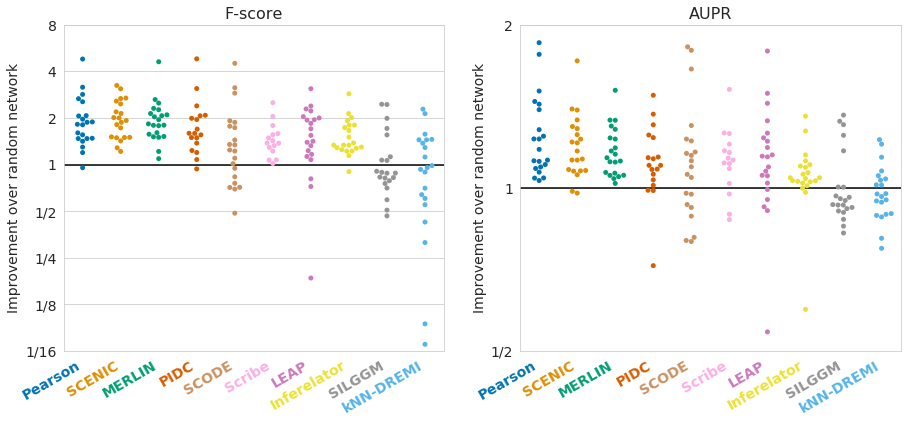

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#for metric, ax in zip(['fscore', 'AUPR', 'n_TFs'], axes):

for metric, ax in zip(['fscore', 'AUPR'], axes):
    data = primary_scores.loc[(primary_scores.algorithm != 'random') &  # Jan 07 revise, Random to random
                              (primary_scores.metric == metric)]
    #print(data.head())    
    if metric == 'n_TFs':
        yval = 'score'
    else:
        yval = 'log_rand_ratio'
    
    order = fig3_order
    
    #order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
#     idx_order = [algorithm_orders.index(a) for a in order]
#     print(idx_order)
    #idx_order = algorithm_orders
    palette = [PALETTE_MAP[i] for i in order]
        
    ax = sns.swarmplot(data=data,
                       x='algorithm', order=order,
                       y=yval,
                       palette=palette,
                       ax=ax)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    [t.set_color(i) for i, t in
     zip(palette, ax.xaxis.get_ticklabels())]

    [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
#     ax.set_ylabel('Fold change\nrelative to random')
    ax.set_ylabel(None)
    ax.axhline(0, c='k')
    ax.set_xlabel(None)

    #if metric != 'n_TFs':
    if metric == 'fscore':
#         ax.set_yticks([-2, -1, 0, 1])
        ax.set_yticks(np.arange(-4, 4, 1))
        ax.set_yticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
        ax.set_ylim(-4, 3)
        ax.set_ylabel('Improvement over random network')
    else:
        ax.set_yticks(np.arange(-1, 2, 1))
        ax.set_yticklabels(['1/2', '1', '2'])
        ax.set_ylim(-1, 1)
        ax.set_ylabel('Improvement over random network')
#     else:
#         ax.set_yticks([-1, 0, 1])
#         ax.set_yticklabels(['1/2', '1', '2'])    
    
    ax.set_title(METRIC_TITLES[metric])

    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

# plt.text(0.02, 0.5, "Fold change relative to random", 
#          fontsize=14,
#          transform=fig.transFigure,
#          rotation=90, va='center', ha='right')
# #          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.3d.pdf'), bbox_inches='tight')

In [71]:
pd.DataFrame(summary.iloc[2,:])

n_TFs
algorithm         
Pearson        2.5
SCENIC         2.5
MERLIN         3.5
PIDC           3.5
LEAP           5.0
SCODE          7.0
Scribe         6.5
SILGGM         9.0
Inferelator    6.0
kNN-DREMI      9.0

In [74]:
pd.DataFrame(summary.iloc[2,:]).median(axis=1).sort_values(ascending=True)

algorithm
Pearson        2.5
SCENIC         2.5
MERLIN         3.5
PIDC           3.5
LEAP           5.0
Inferelator    6.0
Scribe         6.5
SCODE          7.0
SILGGM         9.0
kNN-DREMI      9.0
dtype: float64

In [72]:
# Set up fig4 order
fig4_order = pd.DataFrame(summary.iloc[2,:]).median(axis=1).sort_values(ascending=True).index

In [73]:
fig4_order

Index(['Pearson', 'SCENIC', 'MERLIN', 'PIDC', 'LEAP', 'Inferelator', 'Scribe',
       'SCODE', 'SILGGM', 'kNN-DREMI'],
      dtype='object', name='algorithm')

# Fig 4C

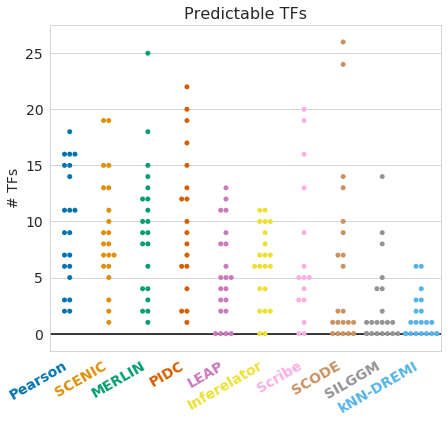

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

#for metric, ax in zip(['fscore', 'AUPR', 'n_TFs'], axes):

metric = 'n_TFs'
data = primary_scores.loc[(primary_scores.algorithm != 'random') &
                              (primary_scores.metric == metric)]
    #print(data.head())    
if metric == 'n_TFs':
    yval = 'score'
else:
    yval = 'log_rand_ratio'
    
#order = 'Pearson SCENIC MERLIN PIDC LEAP SCODE Scribe SILGGM Inferelator kNN-DREMI'.split()
    
#order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
order = fig4_order
#idx_order = [algorithm_orders.index(a) for a in order]
palette = [PALETTE_MAP[i] for i in order]
        
ax = sns.swarmplot(data=data,
                       x='algorithm', order=order,
                       y=yval,
                       palette=palette,
                       ax=ax)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
[t.set_color(i) for i, t in
zip(palette, ax.xaxis.get_ticklabels())]

[t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
#     ax.set_ylabel('Fold change\nrelative to random')
ax.set_ylabel(None)
ax.axhline(0, c='k')
ax.set_xlabel(None)

    #if metric != 'n_TFs':
if metric == 'fscore':
#         ax.set_yticks([-2, -1, 0, 1])
    ax.set_yticks(np.arange(-4, 4, 1))
    ax.set_yticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
    ax.set_ylim(-4, 3)
    ax.set_ylabel('Improvement over random network')
else:
    ax.set_ylabel('# TFs')
#     else:
#         ax.set_yticks([-1, 0, 1])
#         ax.set_yticklabels(['1/2', '1', '2'])    
    
ax.set_title(METRIC_TITLES[metric])

    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

# plt.text(0.02, 0.5, "Fold change relative to random", 
#          fontsize=14,
#          transform=fig.transFigure,
#          rotation=90, va='center', ha='right')
# #          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.4c.pdf'), bbox_inches='tight')

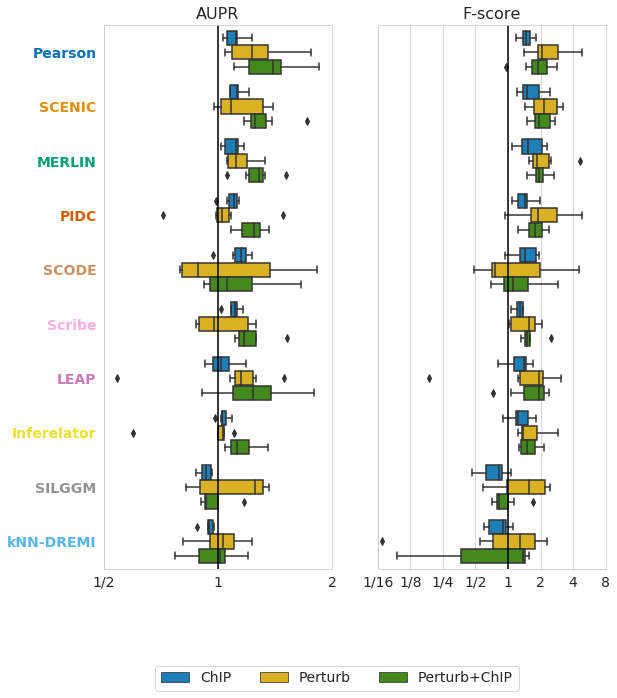

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(9, 10))

for metric, ax in zip(['AUPR', 'fscore'], axes):
    data = primary_scores.loc[(primary_scores.algorithm != 'random') &
                              (primary_scores.metric == metric)]
    
#     order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
    order = fig3_order
    
    #order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
#     idx_order = [algorithm_orders.index(a) for a in order]
#     print(idx_order)
    #idx_order = algorithm_orders
    palette = [PALETTE_MAP[i] for i in order]
    
    ax = sns.boxplot(data=data,
                       y='algorithm', order=order,
                       x='log_rand_ratio',
                       hue='GS_src',
                       palette=[sns.xkcd_rgb['cerulean'], sns.xkcd_rgb['goldenrod'], sns.xkcd_rgb['grass green']],
    #                  hue='GS_type', 
    #                   dodge=True, jitter=True,
                       ax=ax)
    
    if metric == 'AUPR':
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
        [t.set_color(i) for i, t in zip(palette, ax.yaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]
        
        l = ax.legend(frameon=True,      
              title=None, ncol=3,
              bbox_to_anchor=(0.485, 0.0), loc='upper center', 
              bbox_transform=fig.transFigure)
    else:
        ax.set_yticklabels([])
        ax.legend_ = None

    ax.set_xlabel(None)
    ax.axvline(0, c='k')
    ax.set_xlabel(None)

    if metric == 'fscore':
        ax.set_xlim(-4, 3)
        ax.set_xticks(np.arange(-4, 4, 1))
        ax.set_xticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
    else:
        ax.set_xlim(-1, 1)
        ax.set_xticks(np.arange(-1, 2, 1))
        ax.set_xticklabels(['1/2', '1', '2'])

    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    ax.set_title(METRIC_TITLES[metric])
    
    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

#plt.text(0.05, 0.5, "Improvement over random network", 
#         fontsize=14,
#         transform=fig.transFigure,
#         rotation=90, va='center', ha='right')
#          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.3b.pdf'), bbox_inches='tight')

# Redefine Configurations for figure 3a

In [77]:
DATASETS = [
    'gasch_GSE102475',
    'jackson_GSE125162',
    'sridharan_A2S',
    'sridharan_FBS',
    'zhao_GSE114952',
    'shalek_GSE48968',
    'han_GSE107552'
]
METRICS = ['fscore', 'AUPR', 'n_TFs']

In [78]:
ALGORITHMS = 'Inferelator kNN-DREMI LEAP MERLIN PIDC SCENIC SCODE Scribe SILGGM Pearson Random'.split()


In [79]:
ROW_INDEX = ['Perturb', 'ChIP', 'Perturb+ChIP']

In [80]:
def format_dataset(did):
    dname, geo = did.split('_')
    
    if dname == 'sridharan':
        return '{0} ({1})'.format(dname.capitalize(), geo)
    else:
        return dname.capitalize()

In [85]:
print(list(fig3_order).append('random'))

None


In [87]:
list(fig3_order)

['Pearson',
 'SCENIC',
 'MERLIN',
 'PIDC',
 'SCODE',
 'Scribe',
 'LEAP',
 'Inferelator',
 'SILGGM',
 'kNN-DREMI']

In [88]:
fig3_order_with_rand = list(fig3_order)
fig3_order_with_rand.append('Random')

In [89]:
fig3_order_with_rand

['Pearson',
 'SCENIC',
 'MERLIN',
 'PIDC',
 'SCODE',
 'Scribe',
 'LEAP',
 'Inferelator',
 'SILGGM',
 'kNN-DREMI',
 'Random']

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  if sys.path[0] == '':


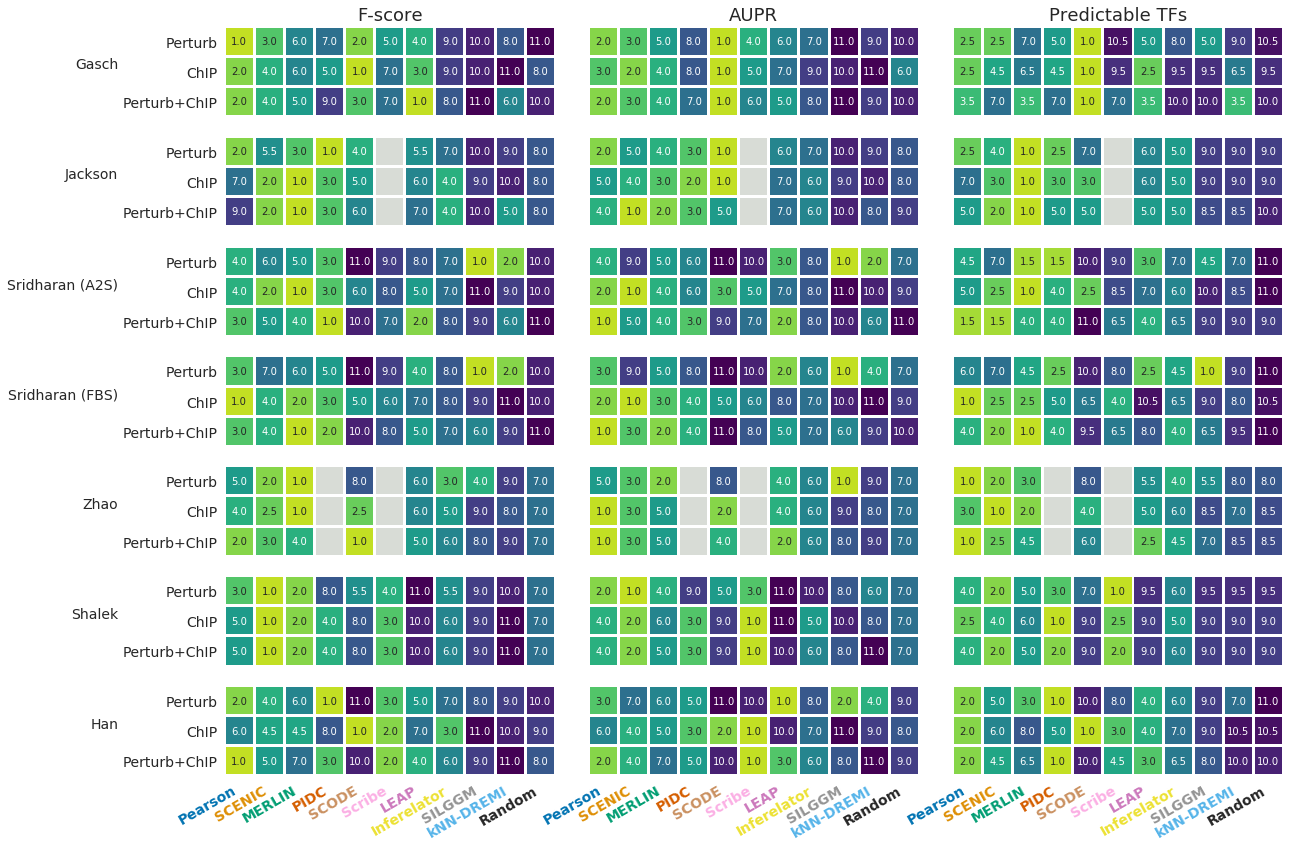

In [131]:
fig, axes = plt.subplots(7, 3, figsize=(18, 12))

for i, (dataset, axrow) in enumerate(zip(DATASETS, axes)):     
    for j, (metric, ax) in enumerate(zip(METRICS, axrow)):
        df = scores.loc[(scores.dataset == dataset) &
                        (scores.metric == metric) &
                        (scores.GS_src.isin(PRIMARY_GS))]
        
        hmap = df.pivot_table(columns='algorithm', 
                              index='GS_src', 
                              values='rank')\
                 .reindex(ROW_INDEX,fig3_order_with_rand)
        
        fmt = '.1f'
        ax = sns.heatmap(hmap, ax=ax,
                         annot=True, fmt=fmt, 
                         cbar=False, mask=hmap.isnull(),
                         cmap='viridis_r', square=True,
                         vmin=0, vmax=11,
                         linewidths=2)
        
        if j == 0:
            ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'])
            ax.set_ylabel(format_dataset(dataset), rotation=0, ha='right')
        else:
            ax.set_yticklabels([])
            ax.set_ylabel(None)
            
        if i < 6:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(fig3_order_with_rand, rotation=30, ha='right')
#             [t.set_color(i) for i, t in
#              zip(ALG_PALETTE, ax.xaxis.get_ticklabels())]
            [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig3_order, ax.xaxis.get_ticklabels())]
            [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
            
        if i == 0:
            ax.set_title(METRIC_TITLES[metric], fontsize=18)
            
        ax.set_xlabel(None)
        ax.set_facecolor(sns.xkcd_rgb['light grey'])
        
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig(os.path.join(OUTDIR, 'fig.3a.pdf'), bbox_inches='tight')

In [128]:
fig4_order_with_rand = list(fig4_order)
fig4_order_with_rand.append('Random')

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  if sys.path[0] == '':


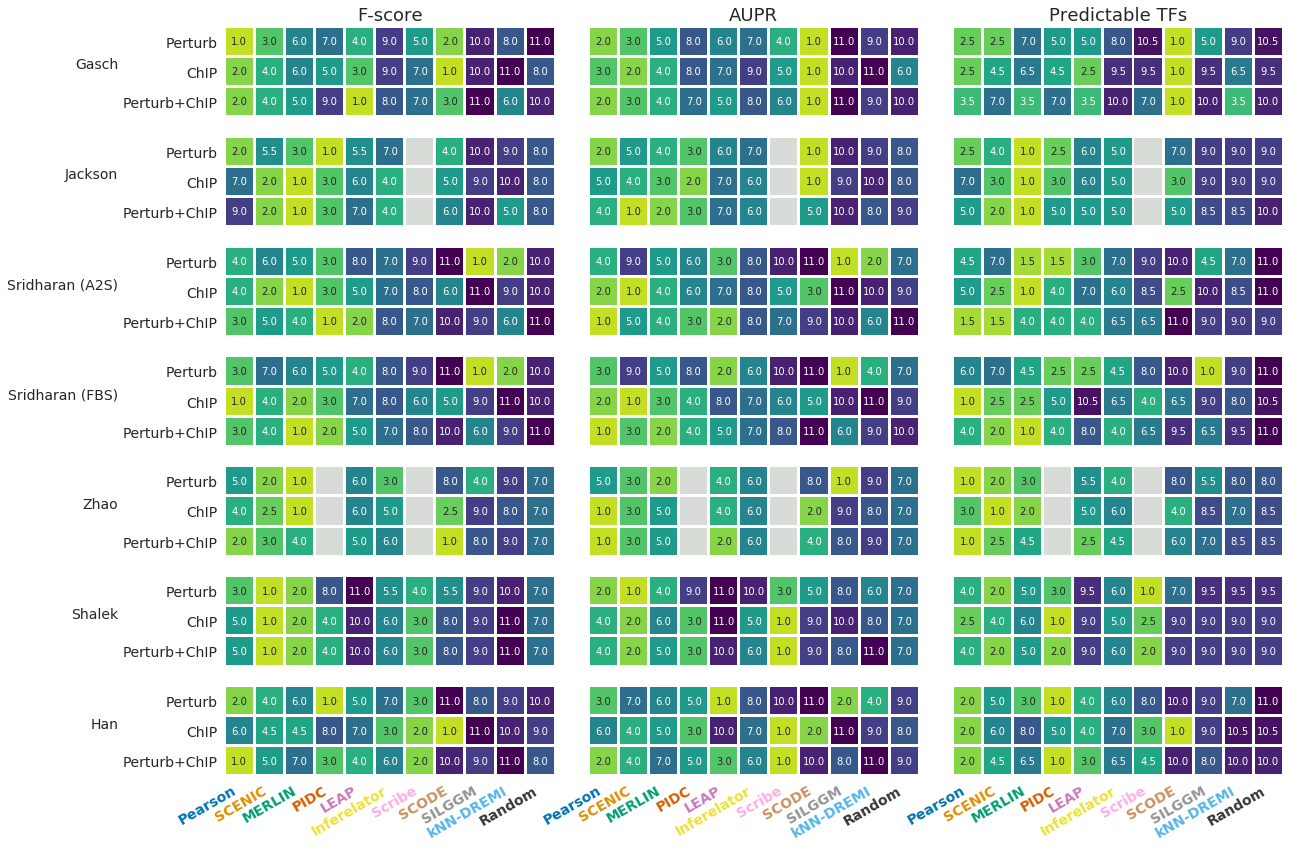

In [130]:
fig, axes = plt.subplots(7, 3, figsize=(18, 12))

for i, (dataset, axrow) in enumerate(zip(DATASETS, axes)):     
    for j, (metric, ax) in enumerate(zip(METRICS, axrow)):
        df = scores.loc[(scores.dataset == dataset) &
                        (scores.metric == metric) &
                        (scores.GS_src.isin(PRIMARY_GS))]
        
        hmap = df.pivot_table(columns='algorithm', 
                              index='GS_src', 
                              values='rank')\
                 .reindex(ROW_INDEX,fig4_order_with_rand)
        
        fmt = '.1f'
        ax = sns.heatmap(hmap, ax=ax,
                         annot=True, fmt=fmt, 
                         cbar=False, mask=hmap.isnull(),
                         cmap='viridis_r', square=True,
                         vmin=0, vmax=11,
                         linewidths=2)
        
        if j == 0:
            ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'])
            ax.set_ylabel(format_dataset(dataset), rotation=0, ha='right')
        else:
            ax.set_yticklabels([])
            ax.set_ylabel(None)
            
        if i < 6:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(fig4_order_with_rand, rotation=30, ha='right')
#             [t.set_color(i) for i, t in
#              zip(ALG_PALETTE, ax.xaxis.get_ticklabels())]
            [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig4_order_with_rand, ax.xaxis.get_ticklabels())]
            [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
            
        if i == 0:
            ax.set_title(METRIC_TITLES[metric], fontsize=18)
            
        ax.set_xlabel(None)
        ax.set_facecolor(sns.xkcd_rgb['light grey'])
        
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig(os.path.join(OUTDIR, 'fig.4a.pdf'), bbox_inches='tight')

In [100]:
fig3_order

Index(['Pearson', 'SCENIC', 'MERLIN', 'PIDC', 'SCODE', 'Scribe', 'LEAP',
       'Inferelator', 'SILGGM', 'kNN-DREMI'],
      dtype='object', name='algorithm')

In [101]:
order

Index(['Pearson', 'SCENIC', 'MERLIN', 'PIDC', 'SCODE', 'Scribe', 'LEAP',
       'Inferelator', 'SILGGM', 'kNN-DREMI'],
      dtype='object', name='algorithm')

In [81]:
SUPPOUTDIR = "/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/notebooks/supp/supp_figs/"

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
  if sys.path[0] == '':


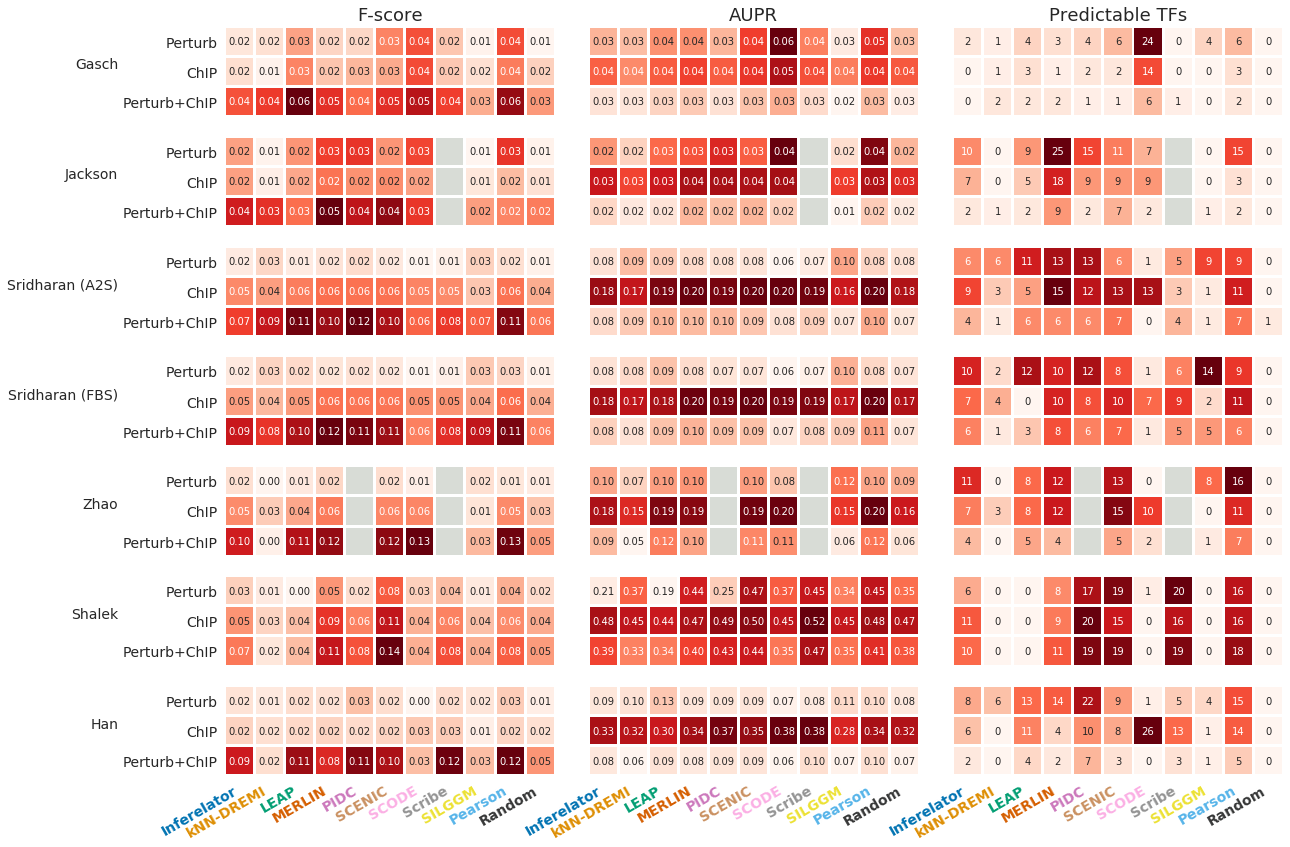

In [82]:
fig, axes = plt.subplots(7, 3, figsize=(18, 12))

for i, (dataset, axrow) in enumerate(zip(DATASETS, axes)):     
    for j, (metric, ax) in enumerate(zip(METRICS, axrow)):
        df = scores.loc[(scores.dataset == dataset) &
                        (scores.metric == metric) &
                        (scores.GS_src.isin(PRIMARY_GS))]
        
        hmap = df.pivot_table(columns='algorithm', 
                              index='GS_src', 
                              values='score')\
                 .reindex(ROW_INDEX,ALGORITHMS)
        
        fmt = '.0f' if metric == 'n_TFs' else '.02f'
        ax = sns.heatmap(hmap, ax=ax,
                         annot=True, fmt=fmt, 
                         cbar=False, mask=hmap.isnull(),
                         cmap='Reds', square=True,
                         linewidths=2)
        
        if j == 0:
            ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'])
            ax.set_ylabel(format_dataset(dataset), rotation=0, ha='right')
        else:
            ax.set_yticklabels([])
            ax.set_ylabel(None)
            
        if i < 6:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(ALGORITHMS, rotation=30, ha='right')
            [t.set_color(i) for i, t in
             zip(ALG_PALETTE, ax.xaxis.get_ticklabels())]

            [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
            
        if i == 0:
            ax.set_title(METRIC_TITLES[metric], fontsize=18)
            
        ax.set_xlabel(None)
        ax.set_facecolor(sns.xkcd_rgb['light grey'])
        
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig(os.path.join(SUPPOUTDIR, 'fig2s1_dataset_scores.pdf'), bbox_inches='tight')

# 3D

In [56]:
alg_order = hmap.mean(axis=0).sort_values(ascending=True).index
idx_order = [ALGORITHMS.index(a) for a in alg_order]
color_order = [ALG_PALETTE[i] for i in idx_order]

NameError: name 'hmap' is not defined

In [45]:
df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]

In [46]:
df

dataset    algorithm   GS_src metric  score  rank
1098    gasch_GSE102475  Inferelator     ChIP  n_TFs    0.0   9.5
1099    gasch_GSE102475  Inferelator  Perturb  n_TFs    2.0   8.0
1100    gasch_GSE102475  Inferelator     Both  n_TFs    0.0  10.0
1103      han_GSE107552  Inferelator     ChIP  n_TFs    6.0   7.0
1106      han_GSE107552  Inferelator  Perturb  n_TFs    8.0   6.0
1107      han_GSE107552  Inferelator     Both  n_TFs    2.0   6.5
1111      sridharan_A2S  Inferelator     ChIP  n_TFs    9.0   6.0
1114      sridharan_A2S  Inferelator  Perturb  n_TFs    6.0   7.0
1115      sridharan_A2S  Inferelator     Both  n_TFs    4.0   6.5
1120      sridharan_FBS  Inferelator     ChIP  n_TFs    7.0   6.5
1123      sridharan_FBS  Inferelator  Perturb  n_TFs   10.0   4.5
1124      sridharan_FBS  Inferelator     Both  n_TFs    6.0   4.0
1127    shalek_GSE48968  Inferelator     ChIP  n_TFs   11.0   5.0
1128    shalek_GSE48968  Inferelator  Perturb  n_TFs    6.0   6.0
1129    shalek_GSE48968  Inferelator     Both  n_TFs   10.0   6.0
1132     zhao_GSE114952  Inferelator     ChIP  n_TFs    7.0   6.0
1135     zhao_GSE114952  Inferelator  Perturb  n_TFs   11.0   4.0
1136     zhao_GSE114952  Inferelator     Both  n_TFs    4.0   4.5
1143  jackson_GSE125162  Inferelator     ChIP  n_TFs    7.0   5.0
1144  jackson_GSE125162  Inferelator  Perturb  n_TFs   10.0   5.0
1145  jackson_GSE125162  Inferelator     Both  n_TFs    2.0   5.0
1150    gasch_GSE102475    kNN-DREMI     ChIP  n_TFs    1.0   6.5
1151    gasch_GSE102475    kNN-DREMI  Perturb  n_TFs    1.0   9.0
1152    gasch_GSE102475    kNN-DREMI     Both  n_TFs    2.0   3.5
1155      han_GSE107552    kNN-DREMI     ChIP  n_TFs    0.0  10.5
1158      han_GSE107552    kNN-DREMI  Perturb  n_TFs    6.0   7.0
1159      han_GSE107552    kNN-DREMI     Both  n_TFs    0.0  10.0
1163      sridharan_A2S    kNN-DREMI     ChIP  n_TFs    3.0   8.5
1166      sridharan_A2S    kNN-DREMI  Perturb  n_TFs    6.0   7.0
1167      sridharan_A2S    kNN-DREMI     Both  n_TFs    1.0   9.0
1172      sridharan_FBS    kNN-DREMI     ChIP  n_TFs    4.0   8.0
1175      sridharan_FBS    kNN-DREMI  Perturb  n_TFs    2.0   9.0
1176      sridharan_FBS    kNN-DREMI     Both  n_TFs    1.0   9.5
1179    shalek_GSE48968    kNN-DREMI     ChIP  n_TFs    0.0   9.0
1180    shalek_GSE48968    kNN-DREMI  Perturb  n_TFs    0.0   9.5
1181    shalek_GSE48968    kNN-DREMI     Both  n_TFs    0.0   9.0
1184     zhao_GSE114952    kNN-DREMI     ChIP  n_TFs    3.0   7.0
1187     zhao_GSE114952    kNN-DREMI  Perturb  n_TFs    0.0   8.0
1188     zhao_GSE114952    kNN-DREMI     Both  n_TFs    0.0   8.5
1195  jackson_GSE125162    kNN-DREMI     ChIP  n_TFs    0.0   9.0
1196  jackson_GSE125162    kNN-DREMI  Perturb  n_TFs    0.0   9.0
1197  jackson_GSE125162    kNN-DREMI     Both  n_TFs    1.0   8.5
1202    gasch_GSE102475         LEAP     ChIP  n_TFs    3.0   2.5
1203    gasch_GSE102475         LEAP  Perturb  n_TFs    4.0   5.0
1204    gasch_GSE102475         LEAP     Both  n_TFs    2.0   3.5
1207      han_GSE107552         LEAP     ChIP  n_TFs   11.0   4.0
1210      han_GSE107552         LEAP  Perturb  n_TFs   13.0   4.0
1211      han_GSE107552         LEAP     Both  n_TFs    4.0   3.0
1215      sridharan_A2S         LEAP     ChIP  n_TFs    5.0   7.0
1218      sridharan_A2S         LEAP  Perturb  n_TFs   11.0   3.0
1219      sridharan_A2S         LEAP     Both  n_TFs    6.0   4.0
1224      sridharan_FBS         LEAP     ChIP  n_TFs    0.0  10.5
1227      sridharan_FBS         LEAP  Perturb  n_TFs   12.0   2.5
1228      sridharan_FBS         LEAP     Both  n_TFs    3.0   8.0
1231    shalek_GSE48968         LEAP     ChIP  n_TFs    0.0   9.0
1232    shalek_GSE48968         LEAP  Perturb  n_TFs    0.0   9.5
1233    shalek_GSE48968         LEAP     Both  n_TFs    0.0   9.0
1236     zhao_GSE114952         LEAP     ChIP  n_TFs    8.0   5.0
1239     zhao_GSE114952         LEAP  Perturb  n_TFs    8.0   5.5
1240     zhao_GSE114952         LEAP     Both  n_TFs    

In [47]:
hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')#\
          #.reindex(ROW_INDEX,alg_order)

In [98]:
scores

dataset    algorithm              GS_src     metric  \
0       gasch_GSE102475  Inferelator                  hu     fscore   
1       gasch_GSE102475  Inferelator                mac2     fscore   
2       gasch_GSE102475  Inferelator        yeastract_c3     fscore   
3       gasch_GSE102475  Inferelator        yeastract_t2     fscore   
4       gasch_GSE102475  Inferelator                ChIP     fscore   
5       gasch_GSE102475  Inferelator             Perturb     fscore   
6       gasch_GSE102475  Inferelator        Perturb+ChIP     fscore   
7         han_GSE107552  Inferelator          encodechip     fscore   
8         han_GSE107552  Inferelator          escapechip     fscore   
9         han_GSE107552  Inferelator                ChIP     fscore   
10        han_GSE107552  Inferelator               logof     fscore   
11        han_GSE107552  Inferelator           nishiyama     fscore   
12        han_GSE107552  Inferelator             Perturb     fscore   
13        han_GSE107552  Inferelator        Perturb+ChIP     fscore   
14        han_GSE107552  Inferelator                 lit     fscore   
15        sridharan_A2S  Inferelator          escapechip     fscore   
16        sridharan_A2S  Inferelator          encodechip     fscore   
17        sridharan_A2S  Inferelator                ChIP     fscore   
18        sridharan_A2S  Inferelator               logof     fscore   
19        sridharan_A2S  Inferelator           nishiyama     fscore   
20        sridharan_A2S  Inferelator             Perturb     fscore   
21        sridharan_A2S  Inferelator        Perturb+ChIP     fscore   
22        sridharan_A2S  Inferelator  ATAC_Day4Day6Union     fscore   
23        sridharan_A2S  Inferelator                 lit     fscore   
24        sridharan_FBS  Inferelator          escapechip     fscore   
25        sridharan_FBS  Inferelator          encodechip     fscore   
26        sridharan_FBS  Inferelator                ChIP     fscore   
27        sridharan_FBS  Inferelator               logof     fscore   
28        sridharan_FBS  Inferelator           nishiyama     fscore   
29        sridharan_FBS  Inferelator             Perturb     fscore   
30        sridharan_FBS  Inferelator        Perturb+ChIP     fscore   
31        sridharan_FBS  Inferelator  ATAC_Day4Day6Union     fscore   
32        sridharan_FBS  Inferelator                 lit     fscore   
33      shalek_GSE48968  Inferelator                ChIP     fscore   
34      shalek_GSE48968  Inferelator             Perturb     fscore   
35      shalek_GSE48968  Inferelator        Perturb+ChIP     fscore   
36       zhao_GSE114952  Inferelator          escapechip     fscore   
37       zhao_GSE114952  Inferelator          encodechip     fscore   
38       zhao_GSE114952  Inferelator                ChIP     fscore   
39       zhao_GSE114952  Inferelator               logof     fscore   
40       zhao_GSE114952  Inferelator           nishiyama     fscore   
41       zhao_GSE114952  Inferelator             Perturb     fscore   
42       zhao_GSE114952  Inferelator        Perturb+ChIP     fscore   
43       zhao_GSE114952  Inferelator  ATAC_Day4Day6Union     fscore   
44       zhao_GSE114952  Inferelator                 lit     fscore   
45    jackson_GSE125162  Inferelator                  hu     fscore   
46    jackson_GSE125162  Inferelator                mac2     fscore   
47    jackson_GSE125162  Inferelator        yeastract_c3     fscore   
48    jackson_GSE125162  Inferelator        yeastract_t2     fscore   
49    jackson_GSE125162  Inferelator                ChIP     fscore   
50    jackson_GSE125162  Inferelator             Perturb     fscore   
51    jackson_GSE125162  Inferelator        Perturb+ChIP     fscore   
52      gasch_GSE102475    kNN-DREMI                  hu     fscore   
53      gasch_GSE102475    kNN-DREMI                mac2     fscore   
54      gasch_GSE102475    kNN-DREMI        yeastract_c3     fscore   
55      gasch_GSE102475    kNN-DREMI    

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # Remove the CWD from sys.path while we load stuff.


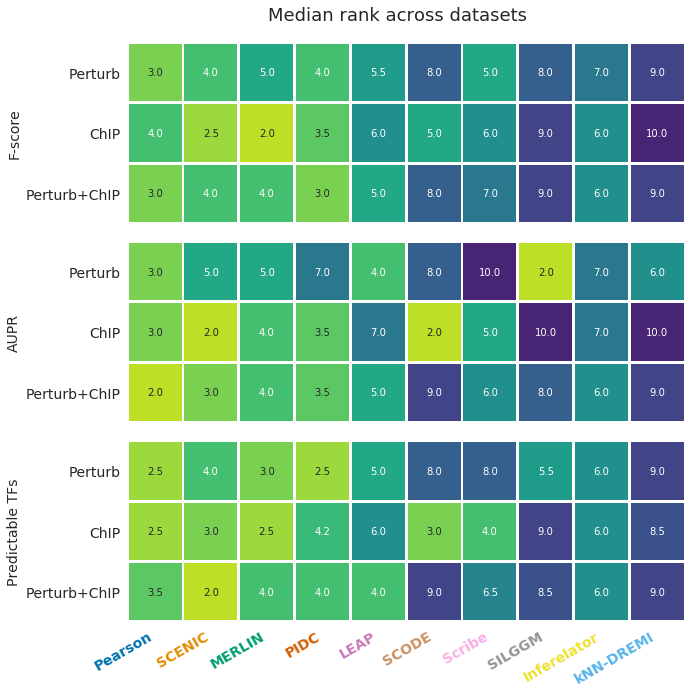

In [116]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for i, (metric, ax) in enumerate(zip(['fscore', 'AUPR', 'n_TFs'], axes)):
    df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]
    hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')\
          .reindex(ROW_INDEX,algorithm_orders)
    
    fmt = '.1f'
    ax = sns.heatmap(hmap, ax=ax,
                     annot=True, fmt=fmt, 
                     vmin=1, vmax=11,
                     cbar=False, mask=hmap.isnull(),
                     cmap='viridis_r', square=False,
                     linewidths=2)
    
    if i < 2:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(algorithm_with_random, rotation=30, ha='right')
        [t.set_color(i) for i, t in
        zip(ALG_PALETTE, ax.xaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
    ax.set_xlabel(None)
    ax.set_ylabel(METRIC_TITLES[metric])
    ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'], rotation=0, ha='right')

fig.suptitle('Median rank across datasets')

plt.subplots_adjust(hspace=0.1, top=0.93)

plt.savefig(os.path.join(OUTDIR, 'fig.3c&4d.pdf'), bbox_inches='tight')

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # Remove the CWD from sys.path while we load stuff.


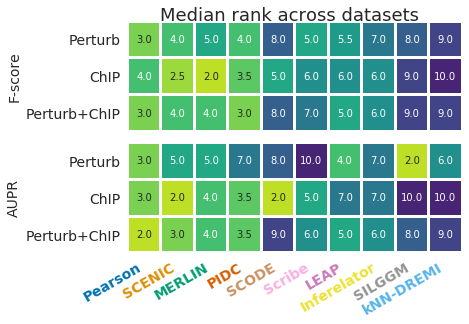

In [105]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for i, (metric, ax) in enumerate(zip(['fscore', 'AUPR'], axes)):
    df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]
    hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')\
          .reindex(ROW_INDEX,fig3_order)
    
    fmt = '.1f'
    ax = sns.heatmap(hmap, ax=ax,
                     annot=True, fmt=fmt, 
                     vmin=1, vmax=11,
                     cbar=False, mask=hmap.isnull(),
                     cmap='viridis_r', square=False,
                     linewidths=2)
    
    if i < 1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(fig3_order, rotation=30, ha='right')
        [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig3_order, ax.xaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
    ax.set_xlabel(None)
    ax.set_ylabel(METRIC_TITLES[metric])
    ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'], rotation=0, ha='right')

fig.suptitle('Median rank across datasets')

plt.subplots_adjust(hspace=0.1, top=0.93)

plt.savefig(os.path.join(OUTDIR, 'fig.3c.pdf'), bbox_inches='tight')

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # Remove the CWD from sys.path while we load stuff.


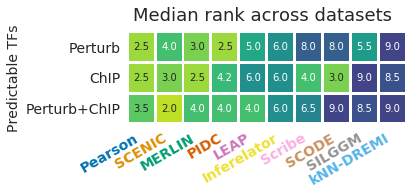

In [132]:
fig, axes = plt.subplots(1, 1, figsize=(5, 1.9))

for i, (metric, ax) in enumerate(zip(['n_TFs'], [axes])):
    df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]
    hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')\
          .reindex(ROW_INDEX,fig4_order)
    
    fmt = '.1f'
    ax = sns.heatmap(hmap, ax=ax,
                     annot=True, fmt=fmt, 
                     vmin=1, vmax=11,
                     cbar=False, mask=hmap.isnull(),
                     cmap='viridis_r', square=False,
                     linewidths=2)
    
    if i < 0:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(fig4_order, rotation=30, ha='right')
        [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig4_order, ax.xaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
    ax.set_xlabel(None)
    ax.set_ylabel(METRIC_TITLES[metric])
    ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'], rotation=0, ha='right')

fig.suptitle('Median rank across datasets')

plt.subplots_adjust(hspace=0.1, top=0.8)

plt.savefig(os.path.join(OUTDIR, 'fig.4b.pdf'), bbox_inches='tight')

# 3E

In [118]:
#summary = summary.drop("Random", axis = 1)
summary = summary.drop("precision", axis = 0)

In [119]:
summary

algorithm  Pearson  SCENIC  MERLIN  PIDC  LEAP  SCODE  Scribe  SILGGM  \
metric                                                                  
fscore         3.0     4.0     3.0   3.0   5.5    6.0     6.0     9.0   
AUPR           2.0     3.0     4.0   4.5   6.0    5.0     5.0     9.0   
n_TFs          2.5     2.5     3.5   3.5   5.0    7.0     6.5     9.0   

algorithm  Inferelator  kNN-DREMI  
metric                             
fscore             7.0        9.0  
AUPR               7.0        9.0  
n_TFs              6.0        9.0

In [122]:
summary_for3e[fig3_order].T

metric       fscore  AUPR
algorithm                
Pearson         3.0   2.0
SCENIC          4.0   3.0
MERLIN          3.0   4.0
PIDC            3.0   4.5
SCODE           6.0   5.0
Scribe          6.0   5.0
LEAP            5.5   6.0
Inferelator     7.0   7.0
SILGGM          9.0   9.0
kNN-DREMI       9.0   9.0

In [120]:
summary_for3e = summary.drop('n_TFs', axis=0)

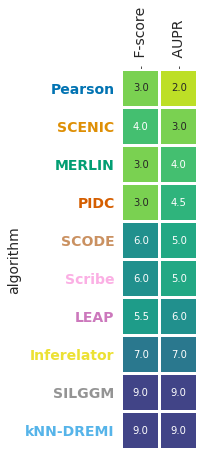

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(3, 7))



'''  
# Set algorithm labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

# ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xticklabels([' Runtime', ' Memory'], rotation=90, ha='center', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(sns.xkcd_rgb['light grey'])
'''

ax = sns.heatmap(summary_for3e[fig3_order].T, ax=ax,
                 annot=True, fmt='.1f', 
                 vmin=1, vmax=11,
                 cbar=False, mask=summary_for3e[fig3_order].T.isnull(),
                 cmap='viridis_r', square=True,
                 linewidths=2)
ax.set_yticklabels(fig3_order, rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig3_order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]


ax.set_xlabel(None)


ax.xaxis.tick_top()
# , ' Predictable\nTFs'
ax.set_xticklabels([' F-score', ' AUPR'], rotation=90, ha='center', va='bottom')

# fig.suptitle('Median rank across datasets')

plt.subplots_adjust(wspace=-0.5)

plt.savefig(os.path.join(OUTDIR, 'fig.3e.pdf'), bbox_inches='tight')

# 4D

In [126]:
summary_for4d = summary.drop(['fscore', 'AUPR'], axis=0)

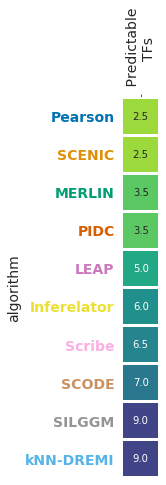

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(3, 7))



'''  
# Set algorithm labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

# ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xticklabels([' Runtime', ' Memory'], rotation=90, ha='center', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(sns.xkcd_rgb['light grey'])
'''

ax = sns.heatmap(summary_for4d[fig4_order].T, ax=ax,
                 annot=True, fmt='.1f', 
                 vmin=1, vmax=11,
                 cbar=False, mask=summary_for4d[fig4_order].T.isnull(),
                 cmap='viridis_r', square=True,
                 linewidths=2)
ax.set_yticklabels(fig4_order, rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig4_order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]


ax.set_xlabel(None)


ax.xaxis.tick_top()
# , ' Predictable\nTFs'
ax.set_xticklabels([' Predictable\nTFs'], rotation=90, ha='center', va='bottom')

# fig.suptitle('Median rank across datasets')

plt.subplots_adjust(wspace=-0.5)

plt.savefig(os.path.join(OUTDIR, 'fig.4d.pdf'), bbox_inches='tight')

# New figure pannel for correlations between gold standards

In [67]:
df = primary_scores.loc[(primary_scores['metric'] == 'fscore') & (primary_scores['algorithm'] != 'Random'),]
pi = df.pivot(index = ['dataset', 'algorithm','metric'], columns = 'GS_src', values = 'rank')

In [53]:
pi['algorithm'] = pi.index.get_level_values('algorithm')


In [68]:
pi['color'] = pi.index.get_level_values('algorithm')

In [76]:
pi['color_idx'] = pi['color'].apply(lambda x : color_dic[x])

In [77]:
pi

GS_src                                ChIP  Perturb  Perturb+ChIP  \
dataset           algorithm   metric                                
gasch_GSE102475   Inferelator fscore   9.0      9.0           8.0   
                  LEAP        fscore   3.0      4.0           1.0   
                  MERLIN      fscore   6.0      6.0           5.0   
                  PIDC        fscore   5.0      7.0           9.0   
                  Pearson     fscore   2.0      1.0           2.0   
                  SCENIC      fscore   4.0      3.0           4.0   
                  SCODE       fscore   1.0      2.0           3.0   
                  SILGGM      fscore  10.0     10.0          11.0   
                  Scribe      fscore   7.0      5.0           7.0   
                  kNN-DREMI   fscore  11.0      8.0           6.0   
han_GSE107552     Inferelator fscore   3.0      7.0           6.0   
                  LEAP        fscore   7.0      5.0           4.0   
                  MERLIN      fscore   4.5      6.0           7.0   
                  PIDC        fscore   8.0      1.0           3.0   
                  Pearson     fscore   6.0      2.0           1.0   
                  SCENIC      fscore   4.5      4.0           5.0   
                  SCODE       fscore   1.0     11.0          10.0   
                  SILGGM      fscore  11.0      8.0           9.0   
                  Scribe      fscore   2.0      3.0           2.0   
                  kNN-DREMI   fscore  10.0      9.0          11.0   
jackson_GSE125162 Inferelator fscore   4.0      7.0           4.0   
                  LEAP        fscore   6.0      5.5           7.0   
                  MERLIN      fscore   1.0      3.0           1.0   
                  PIDC        fscore   3.0      1.0           3.0   
                  Pearson     fscore   7.0      2.0           9.0   
                  SCENIC      fscore   2.0      5.5           2.0   
                  SCODE       fscore   5.0      4.0           6.0   
                  SILGGM      fscore   9.0     10.0          10.0   
                  kNN-DREMI   fscore  10.0      9.0           5.0   
shalek_GSE48968   Inferelator fscore   6.0      5.5           6.0   
                  LEAP        fscore  10.0     11.0          10.0   
                  MERLIN      fscore   2.0      2.0           2.0   
                  PIDC        fscore   4.0      8.0           4.0   
                  Pearson     fscore   5.0      3.0           5.0   
                  SCENIC      fscore   1.0      1.0           1.0   
                  SCODE       fscore   8.0      5.5           8.0   
                  SILGGM      fscore   9.0      9.0           9.0   
                  Scribe      fscore   3.0      4.0           3.0   
                  kNN-DREMI   fscore  11.0     10.0          11.0   
sridharan_A2S     Inferelator fscore   7.0      7.0           8.0   
                  LEAP        fscore   5.0      8.0           2.0   
                  MERLIN      fscore   1.0      5.0           4.0   
                  PIDC        fscore   3.0      3.0           1.0   
                  Pearson     fscore   4.0      4.0           3.0   
                  SCENIC      fscore   2.0      6.0           5.0   
                  SCODE       fscore   6.0     11.0          10.0   
                  SILGGM      fscore  11.0      1.0           9.0   
                  Scribe      fscore   8.0      9.0           7.0   
                  kNN-DREMI   fscore   9.0      2.0           6.0   
sridharan_FBS     Inferelator fscore   8.0      8.0           7.0   
                  LEAP        fscore   7.0      4.0           5.0   
                  MERLIN      fscore   2.0      6.0           1.0   
                  PIDC        fscore   3.0      5.0           2.0   
                  Pearson     fscore   1.0      3.0           3.0   
                  SCENIC      fscore   4.0      7.0           4.0   
                  SCODE       fscore   5.0     11.0          10.0  

In [57]:
order = 'Pearson SCENIC MERLIN PIDC LEAP SCODE Scribe SILGGM Inferelator kNN-DREMI'.split()
    
    #order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
idx_order = [algorithm_orders.index(a) for a in order]
print(idx_order)
    #idx_order = algorithm_orders
palette = [ALG_PALETTE[i] for i in idx_order]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [74]:
color_dic = dict(zip(order, palette))

In [75]:
color_dic

{'Pearson': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'SCENIC': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 'MERLIN': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'PIDC': (0.8352941176470589, 0.3686274509803922, 0.0),
 'LEAP': (0.8, 0.47058823529411764, 0.7372549019607844),
 'SCODE': (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 'Scribe': (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 'SILGGM': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'Inferelator': (0.9254901960784314, 0.8823529411764706, 0.2),
 'kNN-DREMI': (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)}

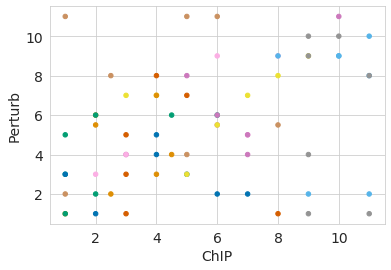

In [78]:
pi.plot.scatter(x = pi.columns[0], y = pi.columns[1], color = pi.color_idx )

In [48]:
pi.index[0]

('gasch_GSE102475', 'Inferelator', 'n_TFs')

In [123]:
metrics

['fscore', 'AUPR', 'n_TFs']

In [104]:
cc_df_rank = pd.DataFrame(columns = ['ChIP~Perturb', 'ChIP~Perturb+ChIP', 'Perturb~Perturb+ChIP'])
for metric in metrics:
    df = primary_scores.loc[primary_scores['metric'] == metric,]
    pi = df.pivot(index = ['dataset', 'algorithm','metric'], columns = 'GS_src', values = 'rank')
    one_row_cc = {'ChIP~Perturb': pi.corr().iloc[1,0], 'ChIP~Perturb+ChIP': pi.corr().iloc[2,0],'Perturb~Perturb+ChIP':pi.corr().iloc[2,1] }
    cc_df_rank = cc_df_rank.append(one_row_cc, ignore_index = True)
cc_df_rank.index = metrics

In [86]:
axes.flatten()[0]

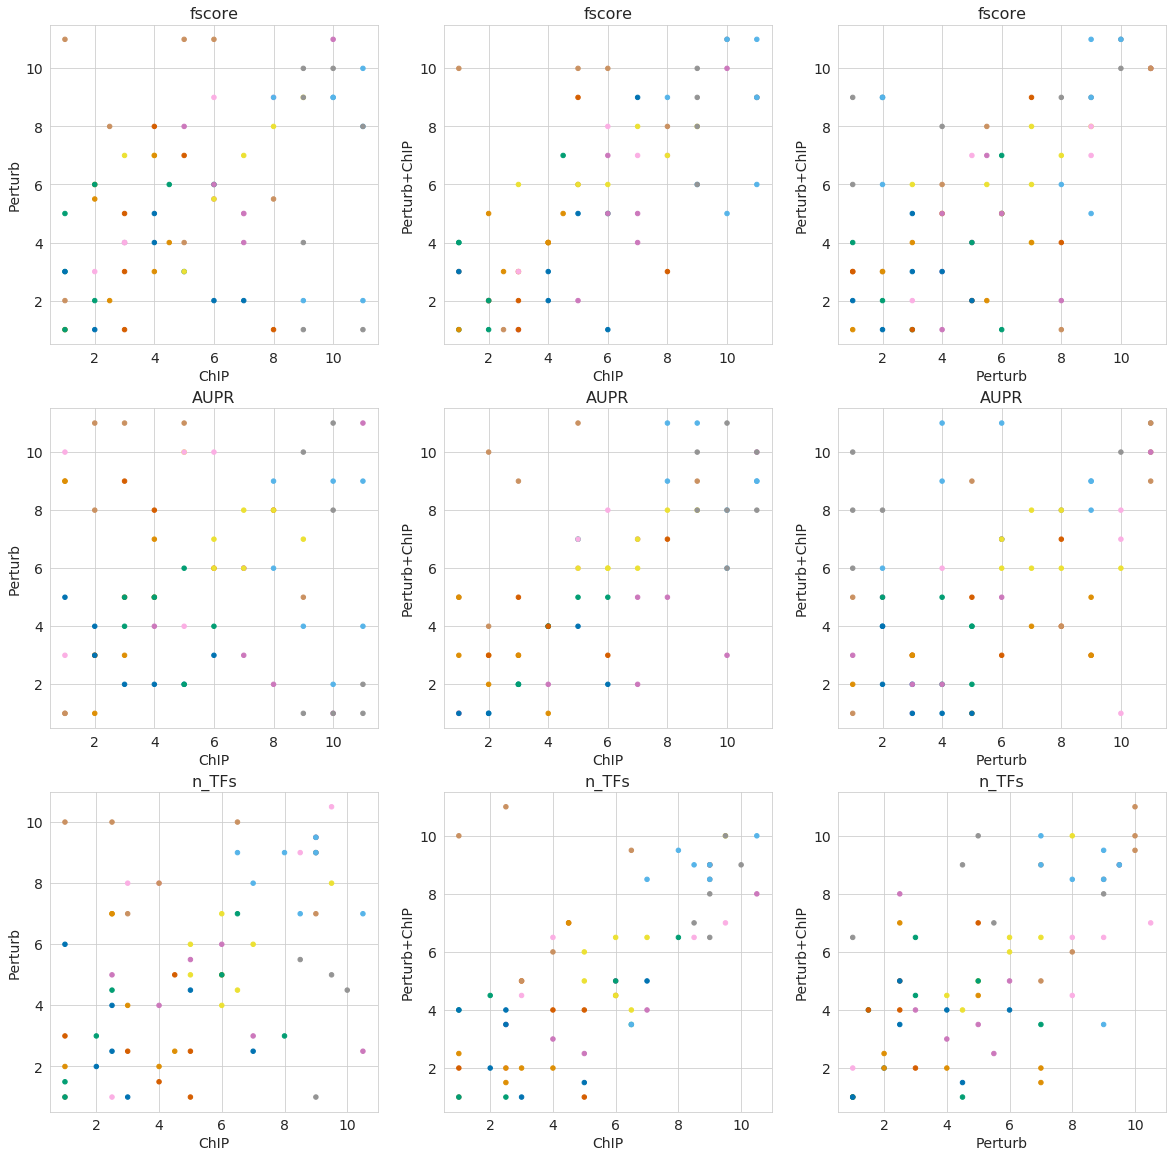

In [92]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
cc_df_rank = pd.DataFrame(columns = ['ChIP~Perturb', 'ChIP~Perturb+ChIP', 'Perturb~Perturb+ChIP'])
for metric, i in zip(metrics, range(3)):
    df = primary_scores.loc[(primary_scores['metric'] == metric) & (primary_scores['algorithm'] != 'Random'),]
    pi = df.pivot(index = ['dataset', 'algorithm','metric'], columns = 'GS_src', values = 'rank')
    pi['color'] = pi.index.get_level_values('algorithm')
    pi['color_idx'] = pi['color'].apply(lambda x : color_dic[x])
    one_row_cc = {'ChIP~Perturb': pi.corr().iloc[1,0], 'ChIP~Perturb+ChIP': pi.corr().iloc[2,0],'Perturb~Perturb+ChIP':pi.corr().iloc[2,1] }
    cc_df_rank = cc_df_rank.append(one_row_cc, ignore_index = True)
    axes.flatten()[3*i+0] = pi.plot.scatter(x = pi.columns[0], y = pi.columns[1], color = pi.color_idx, ax = axes.flatten()[3*i+0])
    axes.flatten()[3*i+1] = pi.plot.scatter(x = pi.columns[0], y = pi.columns[2], color = pi.color_idx, ax = axes.flatten()[3*i+1])
    axes.flatten()[3*i+2] = pi.plot.scatter(x = pi.columns[1], y = pi.columns[2], color = pi.color_idx, ax = axes.flatten()[3*i+2])
    for j in range(3):
        axes.flatten()[3*i+j].set_title(metric)
cc_df_rank.index = metrics

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

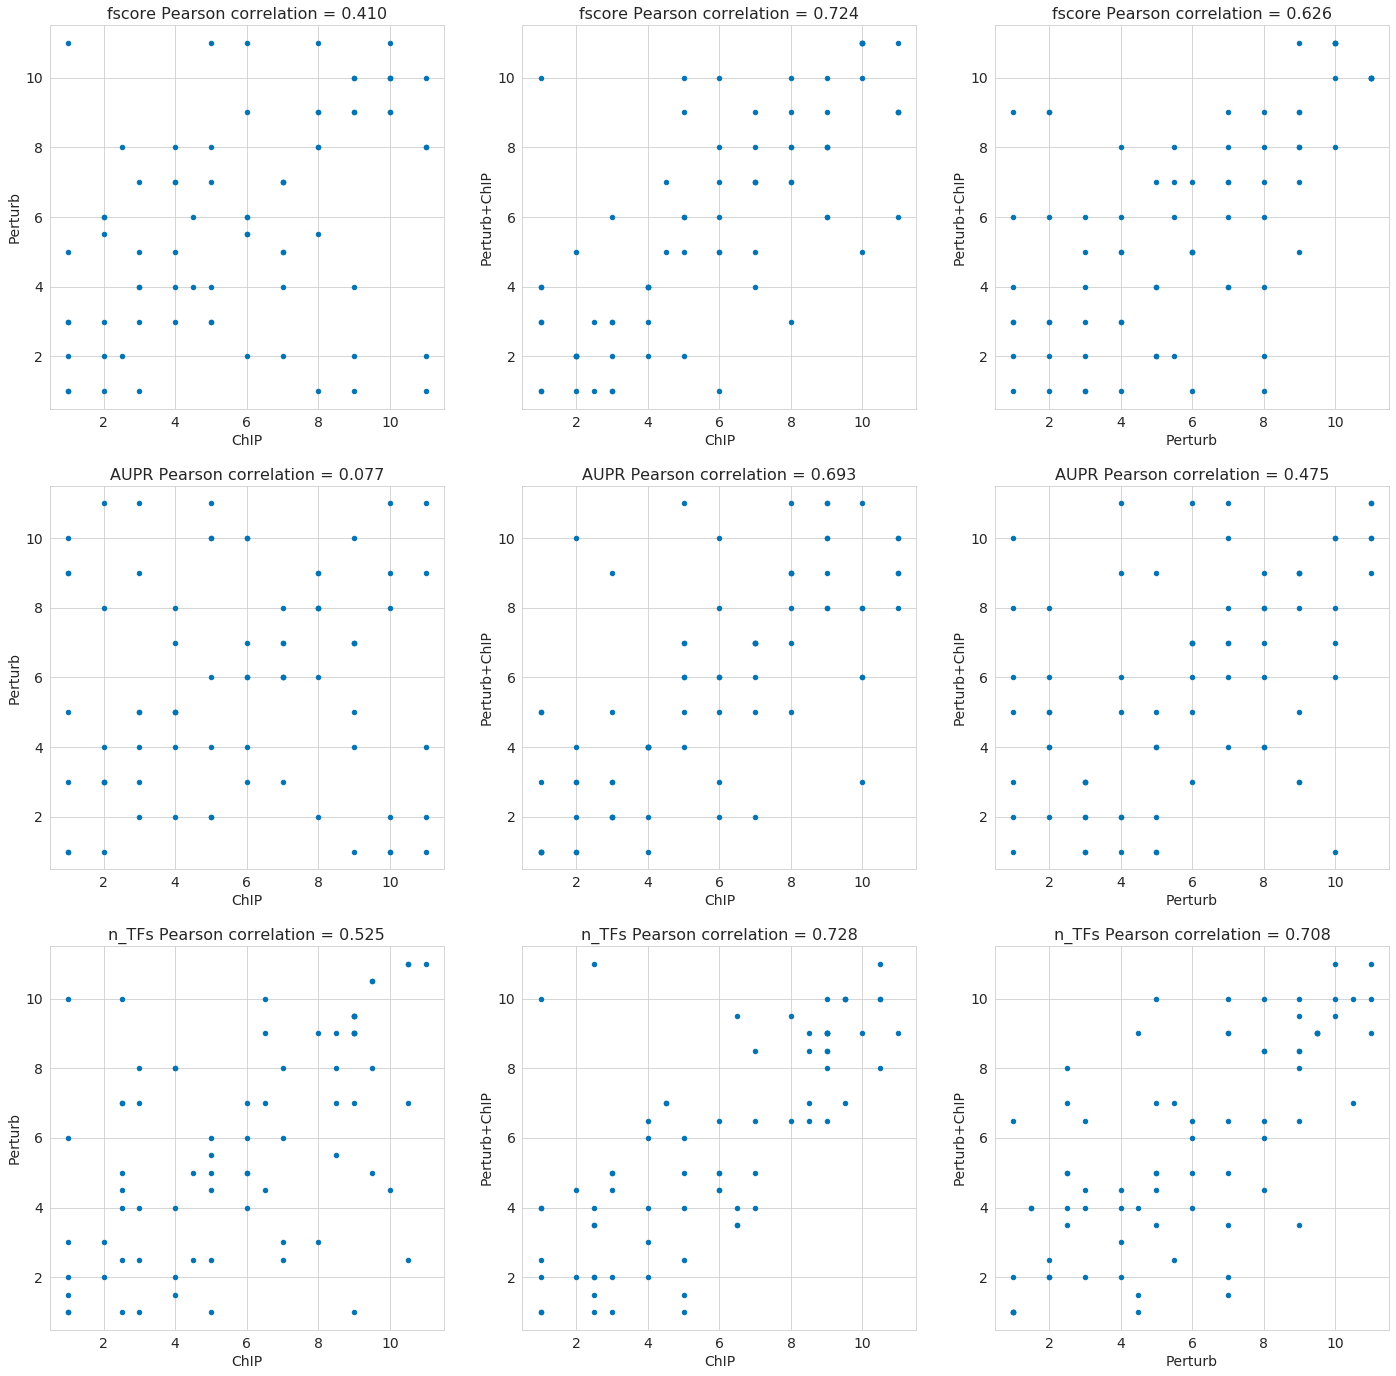

In [110]:
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
cc_df_rank = pd.DataFrame(columns = ['ChIP~Perturb', 'ChIP~Perturb+ChIP', 'Perturb~Perturb+ChIP'])
for metric, i in zip(metrics, range(3)):
    df = primary_scores.loc[(primary_scores['metric'] == metric),]
    pi = df.pivot(index = ['dataset', 'algorithm','metric'], columns = 'GS_src', values = 'rank')
    #pi['color'] = pi.index.get_level_values('algorithm')
    #pi['color_idx'] = pi['color'].apply(lambda x : color_dic[x])
    one_row_cc = {'ChIP~Perturb': pi.corr().iloc[1,0], 'ChIP~Perturb+ChIP': pi.corr().iloc[2,0],'Perturb~Perturb+ChIP':pi.corr().iloc[2,1] }
    cc_df_rank = cc_df_rank.append(one_row_cc, ignore_index = True)
    axes.flatten()[3*i+0] = pi.plot.scatter(x = pi.columns[0], y = pi.columns[1], ax = axes.flatten()[3*i+0])
    #axes.flatten()[3*i+0].text(0.1, 0.5, f'Pearson correlation = {pi.corr().iloc[1,0]}')
    axes.flatten()[3*i+1] = pi.plot.scatter(x = pi.columns[0], y = pi.columns[2], ax = axes.flatten()[3*i+1])
    #axes.flatten()[3*i+1].text(0.1, 0.5, f'Pearson correlation = {pi.corr().iloc[2,0]}')
    axes.flatten()[3*i+2] = pi.plot.scatter(x = pi.columns[1], y = pi.columns[2], ax = axes.flatten()[3*i+2])
    #axes.flatten()[3*i+3].text(0.1, 0.5, f'Pearson correlation = {pi.corr().iloc[2,1]}')
    for j in range(3):
        axes.flatten()[3*i+j].set_title(metric + f' Pearson correlation = {list(one_row_cc.values())[j]:.3f}')
cc_df_rank.index = metrics
fig.savefig(OUTDIR + 'correlation_scatter.pdf', dpi = 100, bbox_inches='tight')

In [105]:
cc_df_rank

ChIP~Perturb  ChIP~Perturb+ChIP  Perturb~Perturb+ChIP
fscore      0.410296           0.723907              0.626169
AUPR        0.077495           0.693449              0.475299
n_TFs       0.525060           0.728380              0.707605

In [130]:
cc_df_score = pd.DataFrame(columns = ['ChIP~Perturb', 'ChIP~Perturb+ChIP', 'Perturb~Perturb+ChIP'])
for metric in metrics:
    df = primary_scores.loc[primary_scores['metric'] == metric,]
    pi = df.pivot(index = ['dataset', 'algorithm','metric'], columns = 'GS_src', values = 'score')
    one_row_cc = {'ChIP~Perturb': pi.corr().iloc[1,0], 'ChIP~Perturb+ChIP': pi.corr().iloc[2,0],'Perturb~Perturb+ChIP':pi.corr().iloc[2,1] }
    cc_df_score = cc_df_score.append(one_row_cc, ignore_index = True)
cc_df_score.index = metrics

In [131]:
cc_df_score

ChIP~Perturb  ChIP~Perturb+ChIP  Perturb~Perturb+ChIP
fscore      0.436828           0.689057              0.287531
AUPR        0.819749           0.854141              0.947545
n_TFs       0.596146           0.660998              0.683073

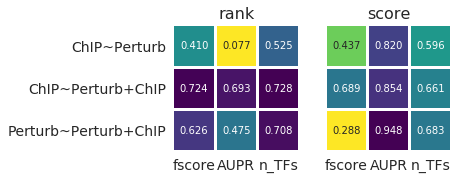

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(5, 10))
'''  
# Set algorithm labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

# ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xticklabels([' Runtime', ' Memory'], rotation=90, ha='center', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(sns.xkcd_rgb['light grey'])
'''
axes[0] = sns.heatmap(cc_df_rank.T, ax=axes[0],
                 annot=True, fmt='.3f', 
                 #vmin=1, vmax=11,
                 cbar=False, mask=cc_df_rank.T.isnull(),
                 cmap='viridis_r', square=True,
                 linewidths=2)
axes[0].set_title('rank')
axes[1] = sns.heatmap(cc_df_score.T, ax=axes[1],
                 annot=True, fmt='.3f', 
                 #vmin=1, vmax=11,
                 cbar=False, mask=cc_df_score.T.isnull(),
                 cmap='viridis_r', square=True,
                 yticklabels = False,
                 linewidths=2)
axes[1].set_title('score')
fig.savefig(OUTDIR + 'correlation.pdf', dpi = 100, bbox_inches='tight')

# New figure pannel for correlations between fscore and AUPR

In [39]:
primary_scores

dataset    algorithm        GS_src     metric      score  rank  \
0      gasch_GSE102475  Inferelator          ChIP     fscore   0.019700   9.0   
1      gasch_GSE102475  Inferelator       Perturb     fscore   0.017600   9.0   
2      gasch_GSE102475  Inferelator  Perturb+ChIP     fscore   0.040900   8.0   
3        han_GSE107552  Inferelator          ChIP     fscore   0.024300   3.0   
4        han_GSE107552  Inferelator       Perturb     fscore   0.017500   7.0   
5        han_GSE107552  Inferelator  Perturb+ChIP     fscore   0.090000   6.0   
6        sridharan_A2S  Inferelator          ChIP     fscore   0.051500   7.0   
7        sridharan_A2S  Inferelator       Perturb     fscore   0.015300   7.0   
8        sridharan_A2S  Inferelator  Perturb+ChIP     fscore   0.074400   8.0   
9        sridharan_FBS  Inferelator          ChIP     fscore   0.045800   8.0   
10       sridharan_FBS  Inferelator       Perturb     fscore   0.017100   8.0   
11       sridharan_FBS  Inferelator  Perturb+ChIP     fscore   0.091300   7.0   
12     shalek_GSE48968  Inferelator          ChIP     fscore   0.054300   6.0   
13     shalek_GSE48968  Inferelator       Perturb     fscore   0.029100   5.5   
14     shalek_GSE48968  Inferelator  Perturb+ChIP     fscore   0.065900   6.0   
15      zhao_GSE114952  Inferelator          ChIP     fscore   0.052900   5.0   
16      zhao_GSE114952  Inferelator       Perturb     fscore   0.017500   3.0   
17      zhao_GSE114952  Inferelator  Perturb+ChIP     fscore   0.098200   6.0   
18   jackson_GSE125162  Inferelator          ChIP     fscore   0.019400   4.0   
19   jackson_GSE125162  Inferelator       Perturb     fscore   0.019200   7.0   
20   jackson_GSE125162  Inferelator  Perturb+ChIP     fscore   0.035800   4.0   
21     gasch_GSE102475    kNN-DREMI          ChIP     fscore   0.014000  11.0   
22     gasch_GSE102475    kNN-DREMI       Perturb     fscore   0.019200   8.0   
23     gasch_GSE102475    kNN-DREMI  Perturb+ChIP     fscore   0.044200   6.0   
24       han_GSE107552    kNN-DREMI          ChIP     fscore   0.019200  10.0   
25       han_GSE107552    kNN-DREMI       Perturb     fscore   0.013000   9.0   
26       han_GSE107552    kNN-DREMI  Perturb+ChIP     fscore   0.019900  11.0   
27       sridharan_A2S    kNN-DREMI          ChIP     fscore   0.044400   9.0   
28       sridharan_A2S    kNN-DREMI       Perturb     fscore   0.025300   2.0   
29       sridharan_A2S    kNN-DREMI  Perturb+ChIP     fscore   0.091000   6.0   
30       sridharan_FBS    kNN-DREMI          ChIP     fscore   0.037300  11.0   
31       sridharan_FBS    kNN-DREMI       Perturb     fscore   0.027300   2.0   
32       sridharan_FBS    kNN-DREMI  Perturb+ChIP     fscore   0.079400   9.0   
33     shalek_GSE48968    kNN-DREMI          ChIP     fscore   0.026900  11.0   
34     shalek_GSE48968    kNN-DREMI       Perturb     fscore   0.013100  10.0   
35     shalek_GSE48968    kNN-DREMI  Perturb+ChIP     fscore   0.016200  11.0   
36      zhao_GSE114952    kNN-DREMI          ChIP     fscore   0.026300   8.0   
37      zhao_GSE114952    kNN-DREMI       Perturb     fscore   0.000600   9.0   
38      zhao_GSE114952    kNN-DREMI  Perturb+ChIP     fscore   0.004300   9.0   
39   jackson_GSE125162    kNN-DREMI          ChIP     fscore   0.007600  10.0   
40   jackson_GSE125162    kNN-DREMI       Perturb     fscore   0.006400   9.0   
41   jackson_GSE125162    kNN-DREMI  Perturb+ChIP     fscore   0.032700   5.0   
42     gasch_GSE102475         LEAP          ChIP     fscore   0.033800   3.0   
43     gasch_GSE102475         LEAP       Perturb     fscore   0.029300   4.0   
44     gasch_GSE102475         LEAP  Perturb+ChIP     fscore   0.062400   1.0   
45       han_GSE107552         LEAP          ChIP     fscore   0.022000   7.0   
46       han_GSE107552         LEAP       Perturb     fscore   0.020200   5.0   
47       han_GSE107552         LEAP  Perturb+ChIP     fscore   0.107000   4.0   
48       sridharan_A2S         LEAP          C

In [34]:
df = primary_scores.loc[primary_scores['GS_src'] == 'ChIP',]
pi = df.pivot(index = ['dataset', 'algorithm',], columns = 'metric', values = 'rank')
pi.corr()

metric         AUPR    fscore     n_TFs  precision
metric                                            
AUPR       1.000000  0.813798  0.761766   0.826050
fscore     0.813798  1.000000  0.831301   0.970037
n_TFs      0.761766  0.831301  1.000000   0.866267
precision  0.826050  0.970037  0.866267   1.000000

In [36]:
cc_df_rank = pd.DataFrame(columns = ['AUPR ~ fscore'])
for GS in ['ChIP','Perturb','Perturb+ChIP']:
    df = primary_scores.loc[primary_scores['GS_src'] == GS,]
    pi = df.pivot(index = ['dataset', 'algorithm'], columns = 'metric', values = 'rank')
    one_row_cc = {'AUPR ~ fscore': pi.corr().iloc[1,0] }
    cc_df_rank = cc_df_rank.append(one_row_cc, ignore_index = True)
cc_df_rank.index = ['ChIP','Perturb','Perturb+ChIP']

In [37]:
cc_df_rank

AUPR ~ fscore
ChIP               0.813798
Perturb            0.755298
Perturb+ChIP       0.894489

In [40]:
cc_df_ratio = pd.DataFrame(columns = ['AUPR ~ fscore'])
for GS in ['ChIP','Perturb','Perturb+ChIP']:
    df = primary_scores.loc[primary_scores['GS_src'] == GS,]
    pi = df.pivot(index = ['dataset', 'algorithm'], columns = 'metric', values = 'log_rand_ratio')
    one_row_cc = {'AUPR ~ fscore': pi.corr().iloc[1,0] }
    cc_df_ratio = cc_df_ratio.append(one_row_cc, ignore_index = True)
cc_df_ratio.index = ['ChIP','Perturb','Perturb+ChIP']

In [42]:
cc_df = pd.merge(left= cc_df_rank, right = cc_df_ratio, left_index = True, right_index = True)

In [44]:
cc_df.columns = ['rank', 'log random ratio']

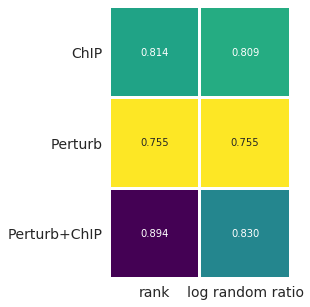

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
'''  
# Set algorithm labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

# ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xticklabels([' Runtime', ' Memory'], rotation=90, ha='center', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(sns.xkcd_rgb['light grey'])
'''
axes = sns.heatmap(cc_df, ax=axes,
                 annot=True, fmt='.3f', 
                 #vmin=1, vmax=11,
                 cbar=False, mask=cc_df.isnull(),
                 cmap='viridis_r', square=True,
                 linewidths=2)
axes.set_yticklabels(axes.get_yticklabels(), rotation = 0)
fig.savefig(OUTDIR + 'correlation_aupr_fscore.pdf', dpi = 80, bbox_inches='tight')

In [ ]:
for metric in metrics:
    df = primary_scores.loc[primary_scores['metric'] == metric,]
    pi = df.pivot(index = ['dataset', 'algorithm','metric'], columns = 'GS_src', values = 'rank')

In [104]:
scores_merged = pd.DataFrame()
for N in [100, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000]:
    data = get_number_edges(N)
    data["TOP_N"] = N
    print(f"data has {data.shape[0]} lines!")
    if scores_merged.shape[1] == 0:
        scores_merged = data
    else:
        scores_merged = pd.concat([scores_merged, data])

data has 547 lines!
data has 547 lines!
data has 547 lines!
data has 547 lines!
data has 547 lines!
data has 547 lines!
data has 547 lines!
data has 547 lines!
data has 547 lines!


In [106]:
scores_merged.shape

(4923, 9)

In [89]:
def get_number_edges(TOP_N):
    #TOP_N = 5000

    idx_cols = 'dataset algorithm proc GS_src'.split()

    # Load metrics
    fscores = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/fscores/agg_fscores.normalized.txt').set_index(idx_cols)
    aupr = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/AUPR/agg_AUPR.normalized.txt').set_index(idx_cols)
    predTFs = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/predictable_TFs/agg_predictable_TFs.normalized.txt').set_index(idx_cols)

    # Choose top N edges (except AUPR, which is based on all edges)
    fscores = fscores.loc[fscores.n_edges == TOP_N].drop('n_edges', axis=1)
    predTFs = predTFs.loc[predTFs.n_edges == TOP_N].drop('n_edges', axis=1)
    aupr = aupr.loc[aupr.n_edges == 'all_edges'].drop('n_edges', axis=1)

    # Concatenate metrics and toss what we don't care about
    scores = pd.concat([fscores, aupr, predTFs], axis=1).reset_index()
    scores = scores.loc[~scores.GS_src.str.endswith('KDUnion_c2')].copy()

    scores.algorithm = scores.algorithm.replace(ALG_FIX)
    scores = scores.loc[scores.algorithm.isin(ALGORITHMS)]
    scores = scores.drop(['proc', 'pred_TFs'], axis=1)
    return scores

In [85]:
PRIMARY_GS

['Perturb', 'ChIP', 'Both']

In [107]:
cell_types = 'yeast mESC mDC hESC'.split()
def clean_GS_src(GS_src):
    data = GS_src.split("_")
    if data[0] in cell_types:
        return '_'.join(data[1:])
    else:
        return '_'.join(data)
    
# Strip cell type labels from gold standard names
scores_merged.GS_src = scores_merged.GS_src.apply(clean_GS_src)

# and renanme the three primary gold standards
scores_merged.GS_src = scores_merged.GS_src.replace({'KDUnion': 'Perturb', 
                                       'chipunion': 'ChIP',
                                       'chipunion_KDUnion_intersect': 'Both'})

In [108]:
df = scores_merged.loc[(scores_merged.dataset == "gasch_GSE102475") &
                        (scores_merged.GS_src == PRIMARY_GS[0])]

In [112]:
table = df.pivot_table(columns = 'TOP_N', index = 'algorithm', values = 'fscore')

In [141]:
table

TOP_N         100     300     500     1000    3000    5000    10000   30000  \
algorithm                                                                     
Inferelator  0.0032  0.0076  0.0113  0.0222  0.0355  0.0409  0.0359  0.0365   
LEAP         0.0021  0.0057  0.0113  0.0286  0.0546  0.0624  0.0532  0.0434   
MERLIN       0.0032  0.0076  0.0122  0.0258  0.0384  0.0459  0.0480  0.0524   
PIDC         0.0053  0.0153  0.0174  0.0243  0.0350  0.0377  0.0407  0.0423   
Pearson      0.0011  0.0067  0.0148  0.0258  0.0492  0.0577  0.0566  0.0489   
Random       0.0021  0.0048  0.0052  0.0107  0.0225  0.0306  0.0397  0.0416   
SCENIC       0.0021  0.0029  0.0087  0.0222  0.0450  0.0462  0.0507  0.0513   
SCODE        0.0032  0.0115  0.0174  0.0286  0.0405  0.0530  0.0587  0.0540   
SILGGM       0.0042  0.0067  0.0087  0.0172  0.0242  0.0277  0.0290  0.0382   
Scribe       0.0032  0.0076  0.0113  0.0186  0.0363  0.0436  0.0448  0.0448   
kNN-DREMI    0.0042  0.0086  0.0139  0.0215  0.0346  0.0442  0.0461  0.0426   

TOP_N         50000  
algorithm            
Inferelator  0.0323  
LEAP         0.0415  
MERLIN       0.0524  
PIDC         0.0437  
Pearson      0.0457  
Random       0.0429  
SCENIC       0.0497  
SCODE        0.0487  
SILGGM       0.0395  
Scribe       0.0454  
kNN-DREMI    0.0396

In [118]:
corr = table.corr(method='spearman')

In [125]:
corr

TOP_N     100       300       500       1000      3000      5000      10000  \
TOP_N                                                                         
100    1.000000  0.936909  0.828623  0.643540  0.248961  0.178500  0.098645   
300    0.936909  1.000000  0.936073  0.806380  0.473805  0.410024  0.287017   
500    0.828623  0.936073  1.000000  0.943055  0.665150  0.592257  0.478361   
1000   0.643540  0.806380  0.943055  1.000000  0.845455  0.781818  0.672727   
3000   0.248961  0.473805  0.665150  0.845455  1.000000  0.990909  0.927273   
5000   0.178500  0.410024  0.592257  0.781818  0.990909  1.000000  0.954545   
10000  0.098645  0.287017  0.478361  0.672727  0.927273  0.954545  1.000000   
30000  0.098645  0.287017  0.478361  0.672727  0.927273  0.954545  1.000000   
50000  0.108286  0.296804  0.493151  0.683373  0.924832  0.952166  0.997725   

TOP_N     30000     50000  
TOP_N                      
100    0.098645  0.108286  
300    0.287017  0.296804  
500    0.478361  0.493151  
1000   0.672727  0.683373  
3000   0.927273  0.924832  
5000   0.954545  0.952166  
10000  1.000000  0.997725  
30000  1.000000  0.997725  
50000  0.997725  1.000000

In [123]:
corr_list = []
for i in range(1,9):
    c = corr.iloc[i, i-1]
    corr_list.append(c)

In [124]:
corr_list

[0.9369089956383606,
 0.9360730593607306,
 0.9430548384868848,
 0.8454545454545455,
 0.990909090909091,
 0.9545454545454546,
 1.0,
 0.9977246841962694]

In [139]:
corr_df = []
for GS_src in PRIMARY_GS:
    df = scores_merged.loc[(scores_merged.dataset == "gasch_GSE102475") &
                        (scores_merged.GS_src == GS_src)]
    table = df.pivot_table(columns = 'TOP_N', index = 'algorithm', values = 'fscore')
    corr = table.corr(method='spearman')
    corr_list = []
    for i in range(1,9):
        c = corr.iloc[i, i-1]
        corr_list.append(c)
    corr_df.append(corr_list)
corr_df = pd.DataFrame(corr_df)
corr_df = corr_df.T
corr_df.index = [300, 500,1000,3000,5000,10000, 30000, 50000]
corr_df.columns = PRIMARY_GS
corr_df["TOP_N"] = [300, 500,1000,3000,5000,10000, 30000, 50000]
    

In [144]:
corr_df

Perturb      ChIP      Both  TOP_N
300    0.936909  0.732427  0.735923    300
500    0.936073  0.889439  0.808860    500
1000   0.943055  0.874144  0.654308   1000
3000   0.845455  0.739734  0.805511   3000
5000   0.990909  0.981818  0.927273   5000
10000  0.954545  0.972727  0.936364  10000
30000  1.000000  0.945455  0.863636  30000
50000  0.997725  0.700000  0.900000  50000

Dataset is gasch_GSE102475
Dataset is jackson_GSE125162
Dataset is sridharan_A2S
Dataset is sridharan_FBS
Dataset is zhao_GSE114952
Dataset is shalek_GSE48968
Dataset is han_GSE107552


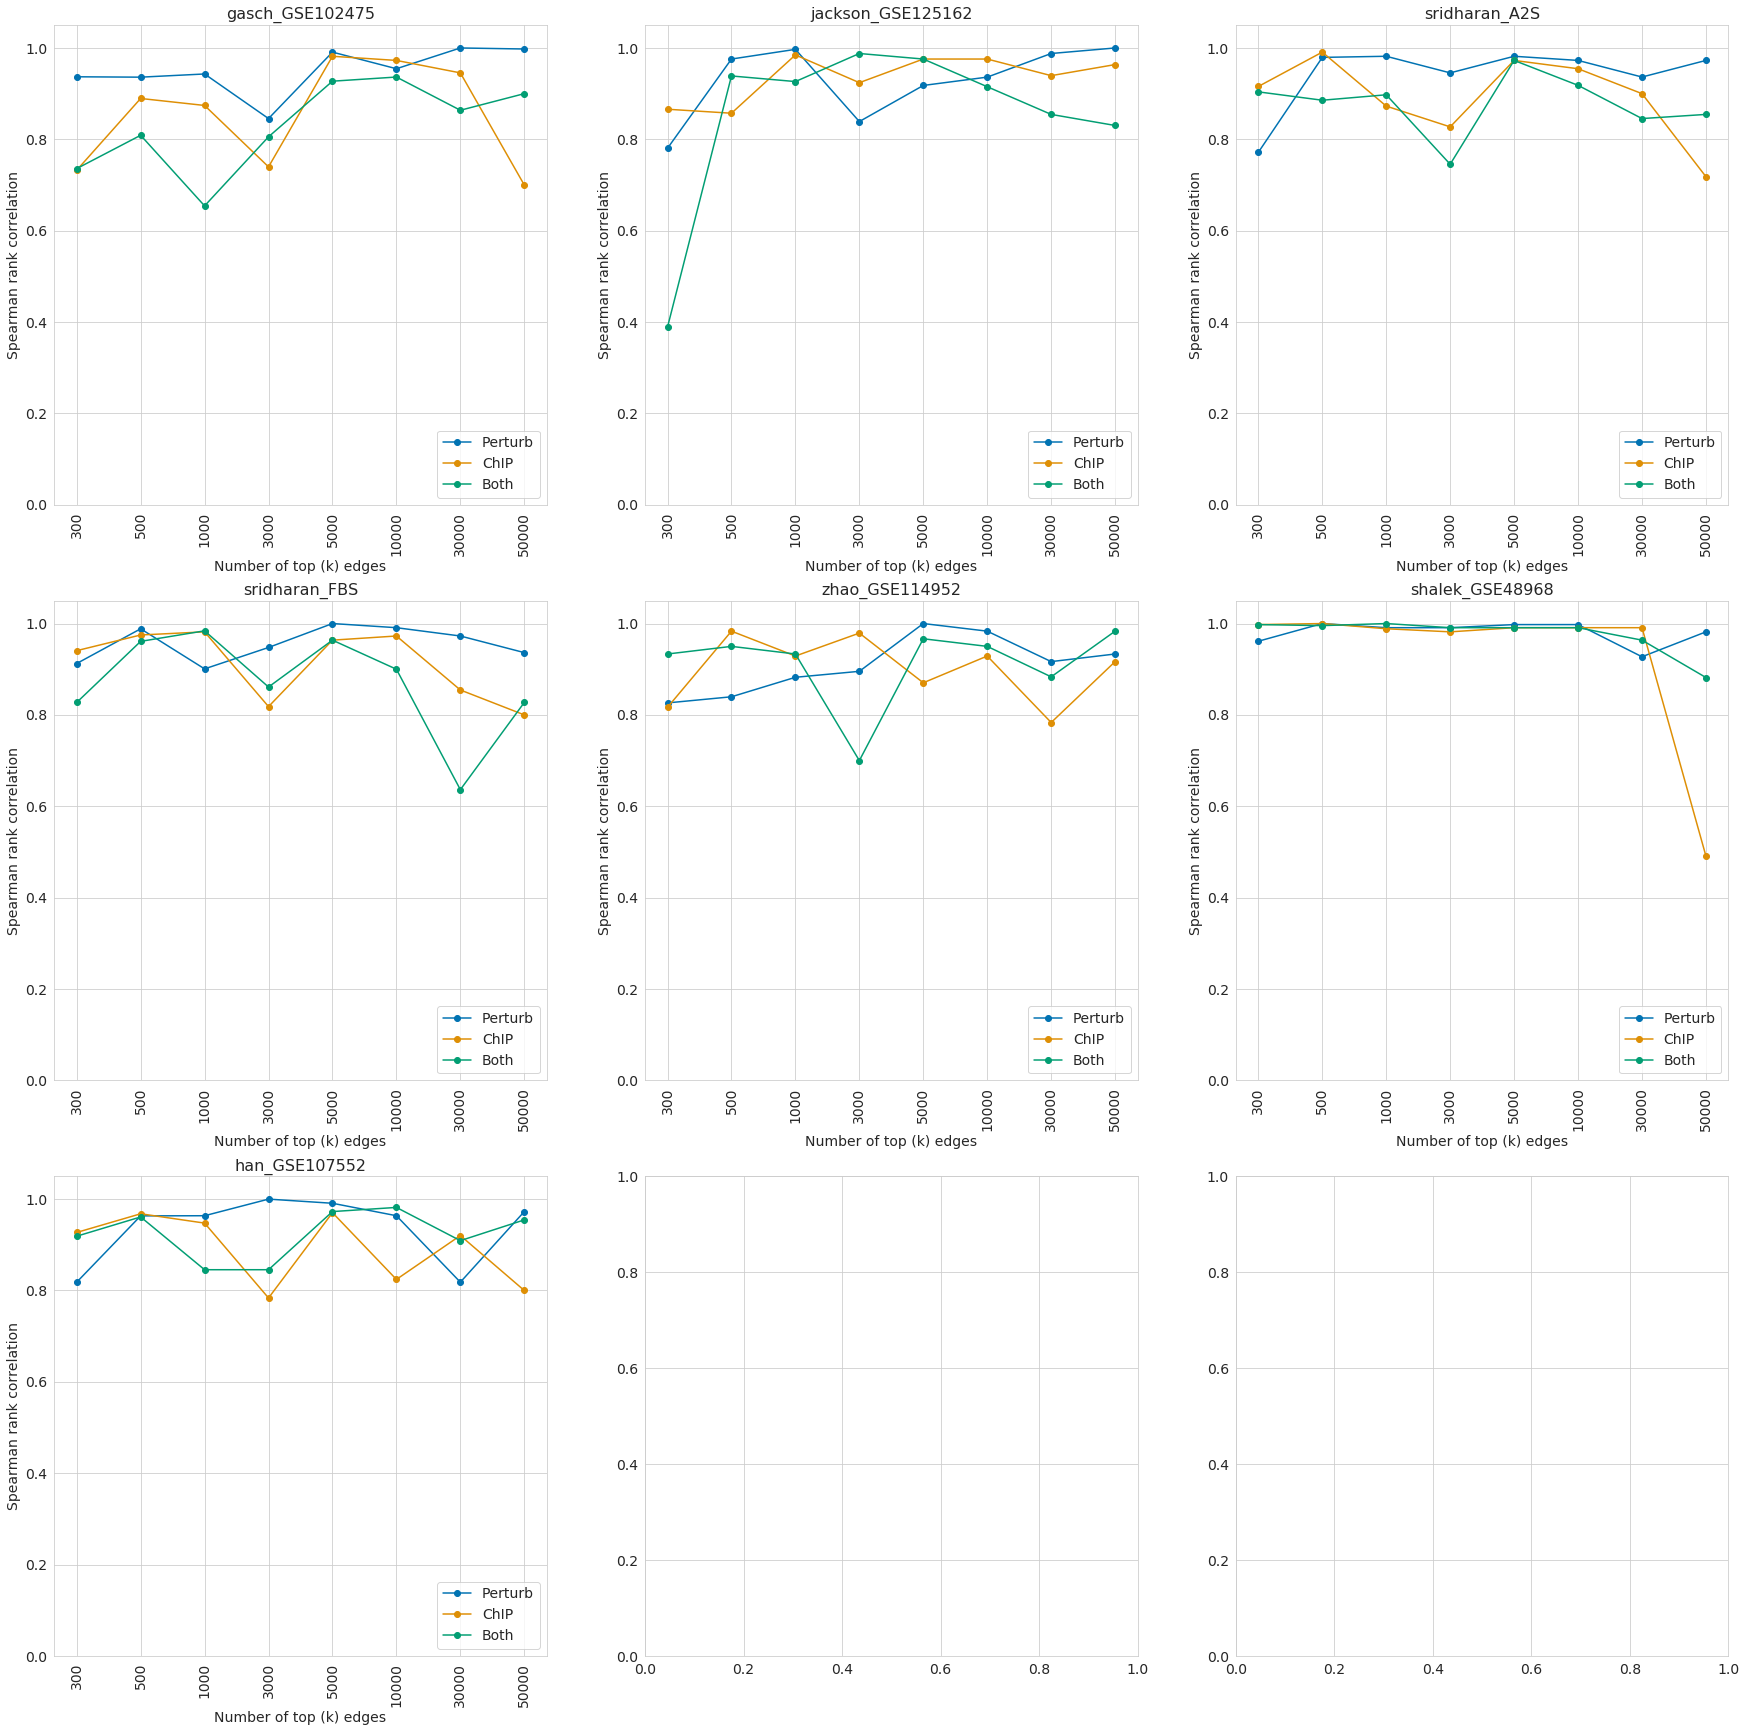

In [184]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

#for metric, ax in zip(['fscore', 'AUPR', 'n_TFs'], axes):

for dataset, ax in zip(DATASETS, axes.flat[0:7]):
    print(f"Dataset is {dataset}")
    corr_df = []
    for GS_src in PRIMARY_GS:
        df = scores_merged.loc[(scores_merged.dataset == dataset) &
                        (scores_merged.GS_src == GS_src)]
        table = df.pivot_table(columns = 'TOP_N', index = 'algorithm', values = 'fscore')
        corr = table.corr(method='spearman')
        corr_list = []
        for i in range(1,9):
            c = corr.iloc[i, i-1]
            corr_list.append(c)
        corr_df.append(corr_list)
    corr_df = pd.DataFrame(corr_df)
    corr_df = corr_df.T
    #print(corr_df)
    ticks = [300, 500,1000,3000,5000,10000, 30000, 50000]
    corr_df.index = ticks
    corr_df.columns = PRIMARY_GS
    corr_df["TOP_N"] = ticks
    corr_df["x"] = np.arange(8)
    
    ax.plot(corr_df["x"], corr_df[PRIMARY_GS[0]], marker = 'o', label = PRIMARY_GS[0])
    ax.plot(corr_df["x"], corr_df[PRIMARY_GS[1]], marker = 'o', label = PRIMARY_GS[1])
    ax.plot(corr_df["x"], corr_df[PRIMARY_GS[2]], marker = 'o', label = PRIMARY_GS[2])
    
    ax.set_xticks(np.arange(8))
    ax.set_xticklabels(ticks, rotation = 90)
    ax.set_ylim(0,1.05)
    ax.set_xlabel("Number of top (k) edges")
    ax.set_ylabel("Spearman rank correlation")
    ax.set_title(dataset)
    
    ax.legend(loc = 'lower right')
    
    #ax.xticks = (np.arange(9), ticks)
    
    #ax = corr_df.plot(x = "TOP_N", marker = 'o')
    
    
plt.savefig(os.path.join(SUPPOUTDIR, 'supplemental.fig.2.pdf'), bbox_inches='tight')
    

In [ ]:
if metric == 'n_TFs':
        yval = 'score'
    else:
        yval = 'log_rand_ratio'
    
    order = 'Pearson SCENIC MERLIN PIDC LEAP SCODE Scribe SILGGM Inferelator kNN-DREMI'.split()
    
    #order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
    idx_order = [ALGORITHMS.index(a) for a in order]
    palette = [sns.color_palette('colorblind')[i] for i in idx_order]
        
    ax = sns.swarmplot(data=data,
                       x='algorithm', order=order,
                       y=yval,
                       palette=palette,
                       ax=ax)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    [t.set_color(i) for i, t in
     zip(palette, ax.xaxis.get_ticklabels())]

    [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
#     ax.set_ylabel('Fold change\nrelative to random')
    ax.set_ylabel(None)
    ax.axhline(0, c='k')
    ax.set_xlabel(None)

    #if metric != 'n_TFs':
    if metric == 'fscore':
#         ax.set_yticks([-2, -1, 0, 1])
        ax.set_yticks(np.arange(-4, 4, 1))
        ax.set_yticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
        ax.set_ylim(-4, 3)
        ax.set_ylabel('Improvement over random network')
    else:
        ax.set_yticks(np.arange(-1, 2, 1))
        ax.set_yticklabels(['1/2', '1', '2'])
        ax.set_ylim(-1, 1)
        ax.set_ylabel('Improvement over random network')
#     else:
#         ax.set_yticks([-1, 0, 1])
#         ax.set_yticklabels(['1/2', '1', '2'])    
    
    ax.set_title(METRIC_TITLES[metric])

    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

# plt.text(0.02, 0.5, "Fold change relative to random", 
#          fontsize=14,
#          transform=fig.transFigure,
#          rotation=90, va='center', ha='right')
# #          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.3d.pdf'), bbox_inches='tight')